### COVID-PERSISTENTE

# Análisis de Síntomas Prolongados de COVID-19

## Descripción del Conjunto de Datos
Respuestas de pacientes que reportan síntomas prolongados de COVID-19. Los datos incluyen:
- **Fatiga**: 9 ítems
- **Estado de ánimo**: 16 ítems
- **Síntomas persistentes**: 8 categorías

**Fuente de datos**:  
[Long COVID Dataset](https://plos.figshare.com/articles/dataset/Long_COVID_english_version_/29494026?file=56034084)

---

## Objetivos de Análisis en Python

### I. Análisis de Ítems de Fatiga (9 ítems)
1. **Histogramas**  
   Generar histogramas para cada uno de los 9 ítems de fatiga.

2. **Mapa de Calor de Correlaciones**  
   Visualizar correlaciones entre todos los ítems de fatiga mediante un heatmap.

3. **Comparación de Medias**  
   Realizar comparación de medias para todos los ítems de fatiga incluyendo pruebas _post hoc_.

---

### II. Análisis de Ítems de Estado de Ánimo (16 ítems)
1. **Histogramas**  
   Generar histogramas para cada uno de los 16 ítems de estado de ánimo.

2. **Mapa de Calor de Correlaciones**  
   Visualizar correlaciones entre todos los ítems de estado de ánimo mediante un heatmap.

3. **Comparación de Medias**  
   Realizar comparación de medias para todos los ítems de estado de ánimo incluyendo pruebas _post hoc_.

---

### III. Clasificación de Síntomas Persistentes
Generar código para clasificar los tipos de síntomas persistentes experimentados según:  
- Ítems de fatiga  
- Ítems de estado de ánimo  

---

### IV. Análisis Filtrado por Pacientes con 3+ Síntomas
Repetir todo el estudio anterior filtrando el dataset para incluir **solo pacientes que reporten 3 o más síntomas persistentes**.

--- 

**Nota**: Todos los análisis deben implementarse en Python usando librerías como `pandas`, `matplotlib`, `seaborn`, y `scipy`.

El **COVID persistente**, también conocido como **COVID largo**, **síndrome post-COVID** o **secuelas post-agudas del SARS-CoV-2**, se refiere a la persistencia de síntomas o la aparición de nuevos síntomas después de la fase aguda de la infección por COVID-19 (generalmente después de 4 semanas desde el inicio de la enfermedad). Afecta a un porcentaje significativo de pacientes, incluso aquellos que tuvieron casos leves o asintomáticos.

### **Síntomas comunes del COVID persistente:**
- **Fatiga extrema** (el síntoma más frecuente).
- **Dificultad para respirar** o falta de aire.
- **Niebla mental** (problemas de concentración, memoria o claridad mental).
- **Dolor muscular o articular**.
- **Dolor de cabeza** persistente.
- **Pérdida del olfato o gusto** (parosmia o disgeusia).
- **Problemas cardíacos** (palpitaciones, taquicardia).
- **Problemas digestivos** (diarrea, dolor abdominal).
- **Alteraciones del sueño** (insomnio o hipersomnia).
- **Ansiedad, depresión o trastornos del ánimo**.

### **Posibles causas (aún en estudio):**
- Daño orgánico persistente (pulmones, corazón, sistema nervioso).
- Respuesta inflamatoria prolongada o autoinmune.
- Presencia de reservorios virales en el cuerpo.
- Alteración de la microbiota intestinal.
- Disfunción del sistema nervioso autónomo (como en el síndrome de taquicardia postural ortostática - **POTS**).

### **¿Quiénes tienen mayor riesgo?**
- Personas con infección grave (especialmente quienes estuvieron hospitalizados o en UCI).
- Mujeres (algunos estudios sugieren mayor prevalencia).
- Pacientes con enfermedades crónicas previas (diabetes, obesidad, asma).
- Personas no vacunadas (aunque también puede ocurrir en vacunados).

### **Diagnóstico:**
No existe una prueba específica, por lo que se basa en:
- **Historial clínico** (infección previa por COVID-19).
- **Exclusión de otras enfermedades** con síntomas similares.
- **Pruebas complementarias** según los síntomas (análisis de sangre, radiografías, resonancias, etc.).

### **Tratamiento:**
No hay un tratamiento único, pero se enfoca en el manejo sintomático:
- **Rehabilitación pulmonar** y fisioterapia para la fatiga y la disnea.
- **Terapia cognitivo-conductual** para la niebla mental y salud mental.
- **Medicamentos** para síntomas específicos (analgésicos, antiinflamatorios, betabloqueantes para taquicardia).
- **Ejercicio gradual** (evitando el sobreesfuerzo).
- **Dieta equilibrada** y suplementos (como vitamina D, bajo supervisión médica).

### **Recomendaciones:**
- **Consulta médica** si los síntomas persisten o empeoran.
- **Paciencia y autocuidado**, ya que la recuperación puede ser lenta.
- **Vacunación** (puede reducir el riesgo de COVID persistente en nuevas infecciones).

### **Investigación en curso:**
Se están estudiando terapias como antivirales de larga duración, inmunomoduladores y terapias de células madre, pero aún no hay evidencia concluyente.

1️⃣ Histogramas ítems de fatiga

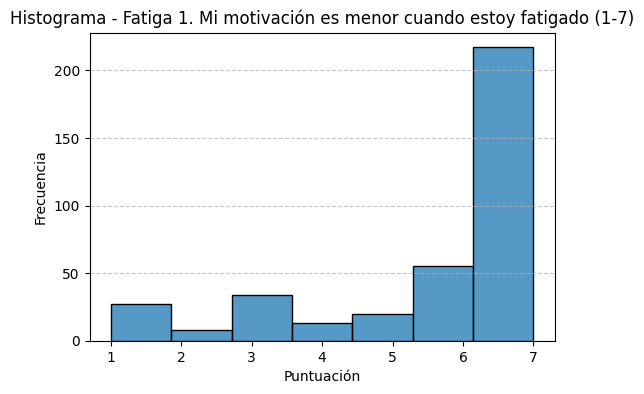

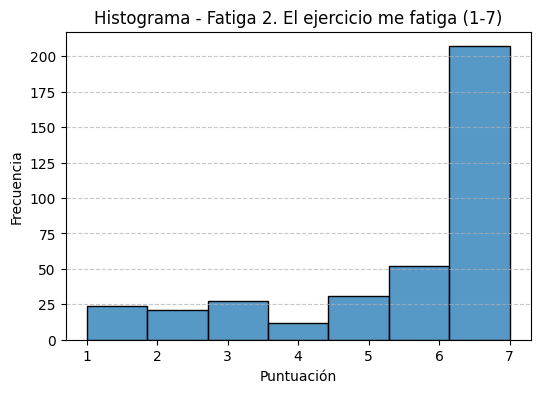

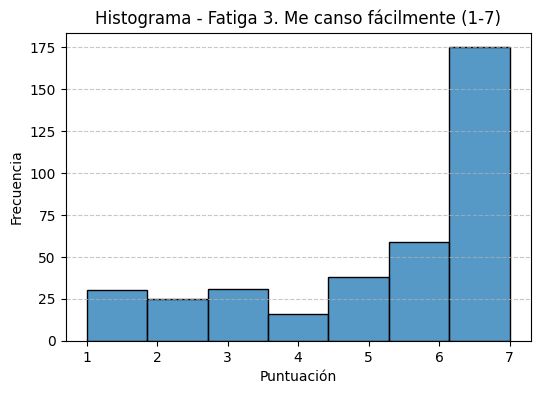

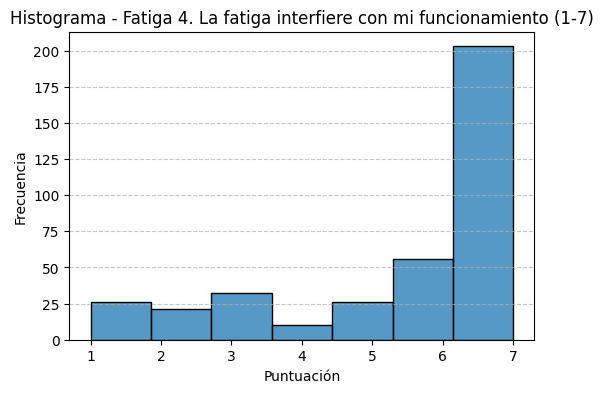

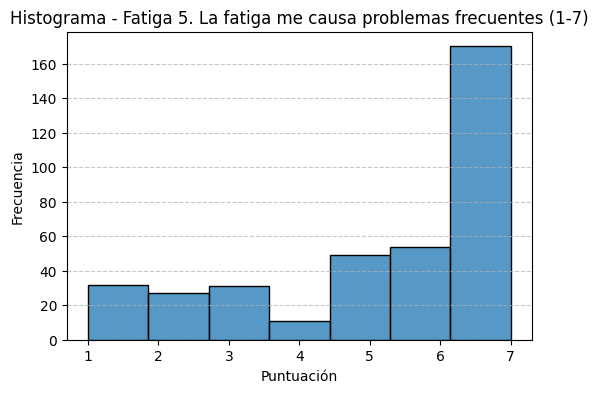

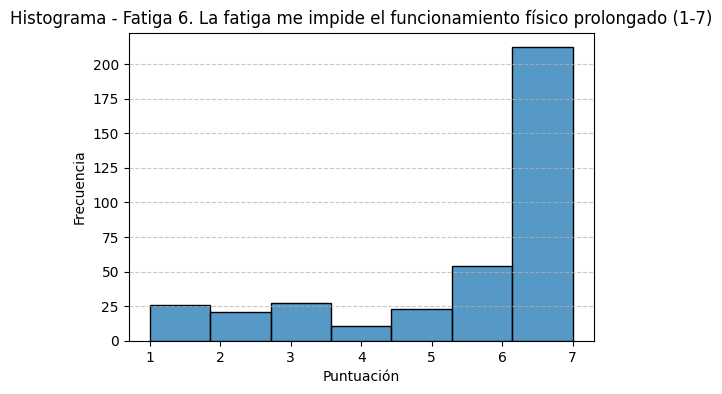

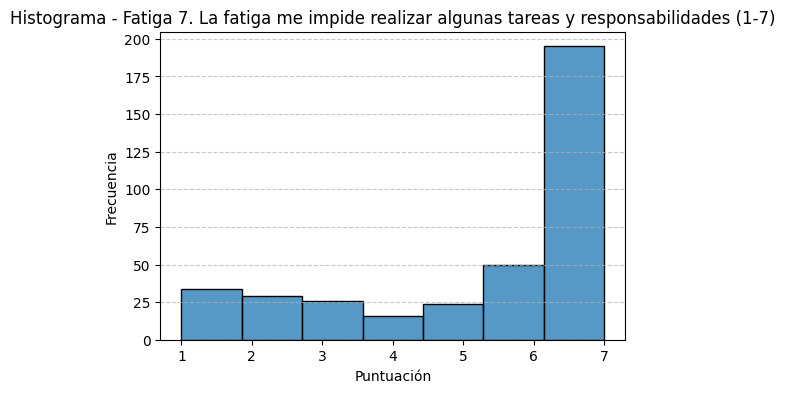

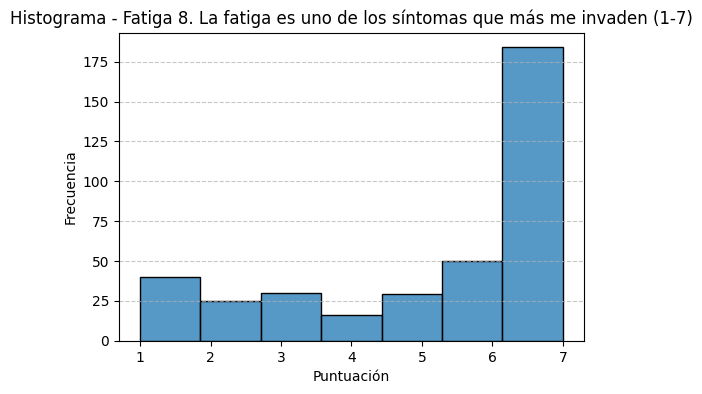

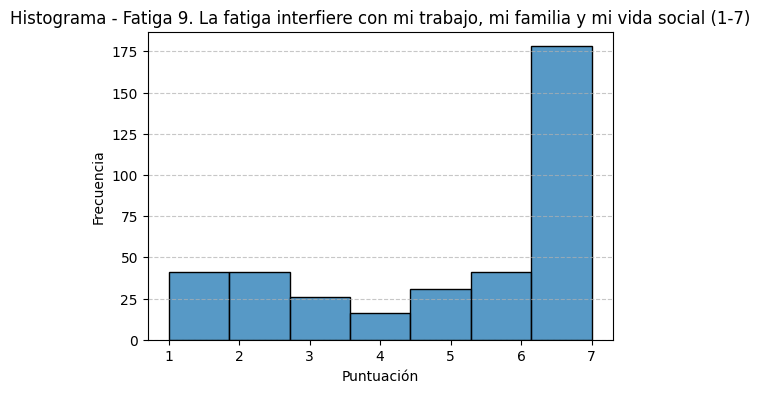

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = "percepcion_covid_persistente.xlsx"
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")

# Seleccionar columnas de fatiga
fatiga_cols = [col for col in df.columns if col.startswith("Fatiga")]

# Graficar histogramas
for col in fatiga_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=7, kde=False)
    plt.title(f"Histograma - {col}")
    plt.xlabel("Puntuación")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


2️⃣ Mapa de calor correlaciones ítems de fatiga

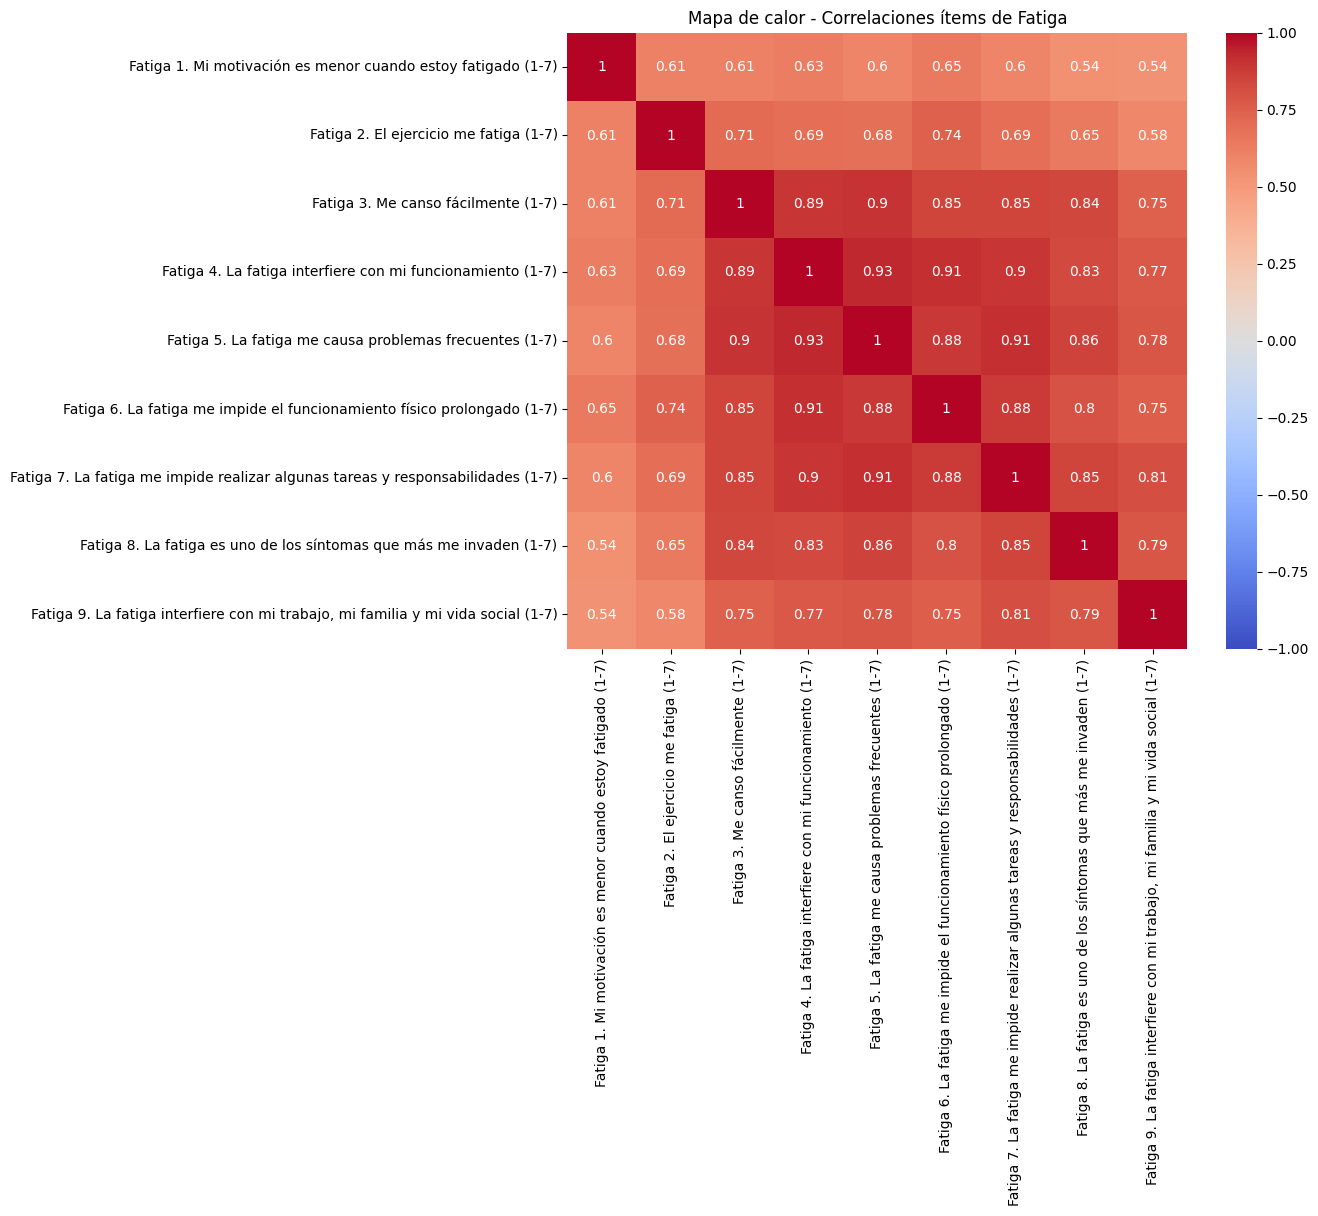

In [2]:
# Calcular matriz de correlaciones
corr_fatiga = df[fatiga_cols].corr()

# Graficar mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_fatiga, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de calor - Correlaciones ítems de Fatiga")
plt.show()


3️⃣ Comparación de medias ítems de fatiga con pruebas post hoc

In [3]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA de una vía
anova_result = f_oneway(*(df[col].dropna() for col in fatiga_cols))
print("ANOVA resultado:", anova_result)

# Preparar datos para Tukey HSD
melted_fatiga = df[fatiga_cols].melt(var_name="Ítem", value_name="Puntuación")

# Prueba post hoc Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=melted_fatiga["Puntuación"],
                                 groups=melted_fatiga["Ítem"],
                                 alpha=0.05)
print(tukey_result)


ANOVA resultado: F_onewayResult(statistic=np.float64(3.9412250983434904), pvalue=np.float64(0.00011871403689150561))
                                                                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                          
                                     group1                                                                          group2                                      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                   Fatiga 1. Mi motivación es menor cuando estoy fatigado (1-7)                                           Fatiga 2. El ejercicio me fatiga (1-7)  -0.0936 0.9995 -0.5608  0.3736  False
                   Fatiga 1. Mi motivación es menor cuando estoy fatigado (1-7)    

4️⃣ Repetir análisis para estado de ánimo

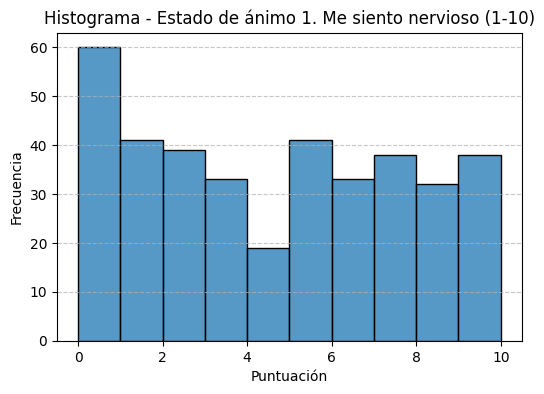

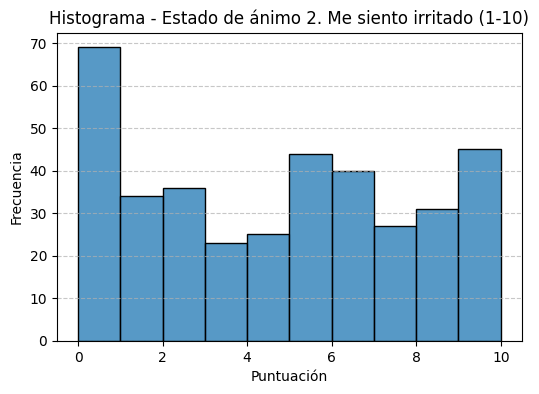

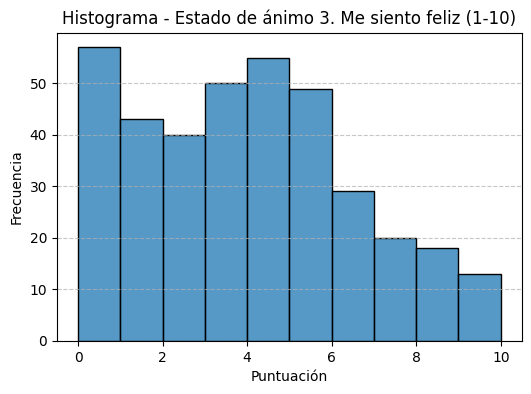

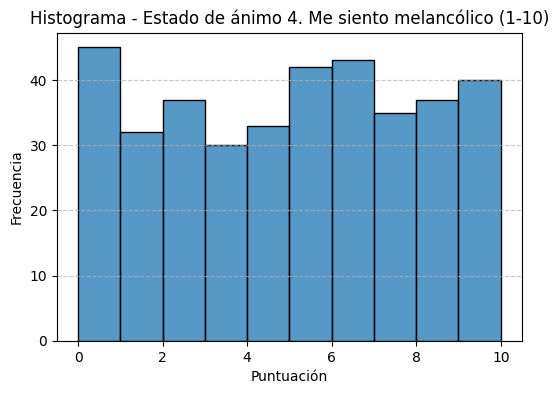

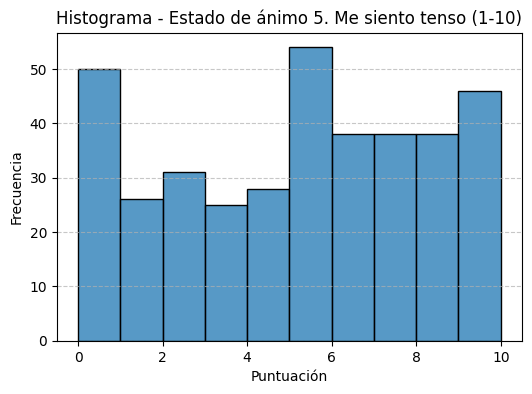

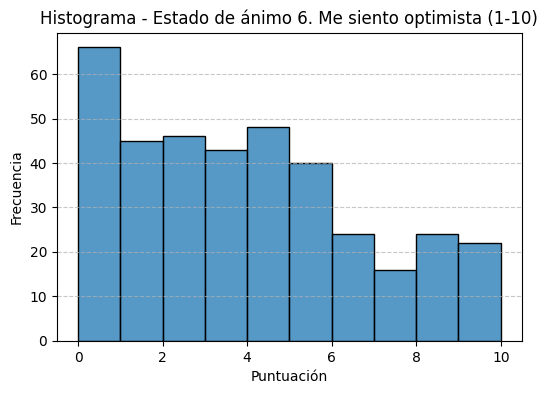

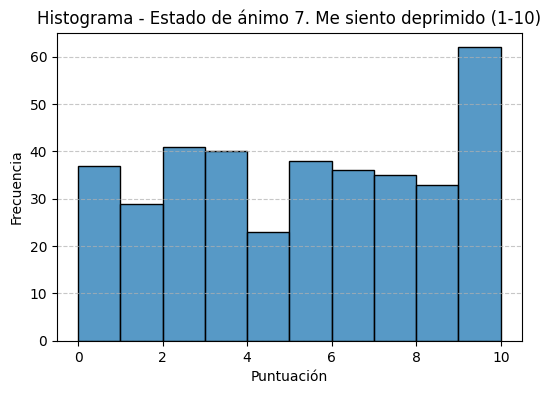

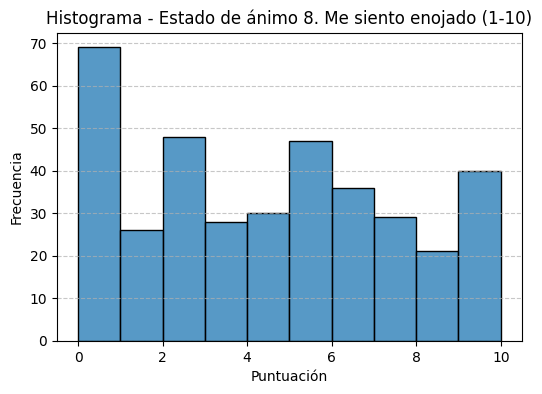

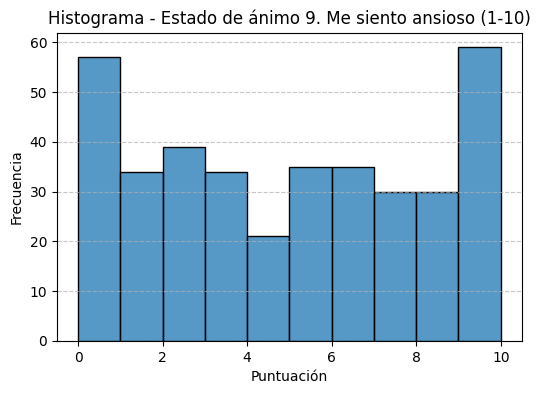

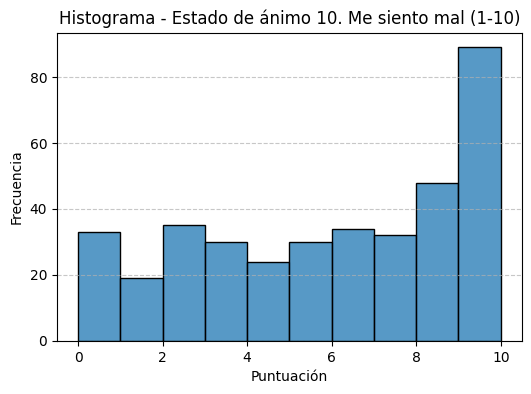

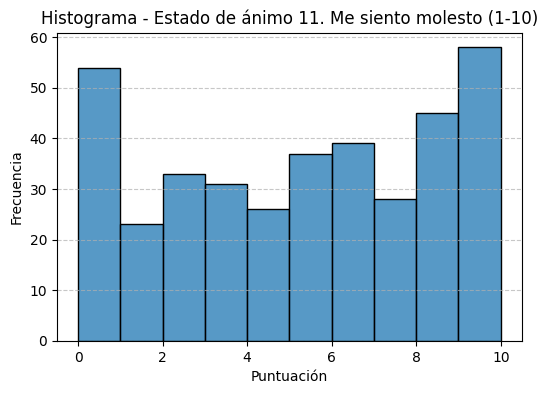

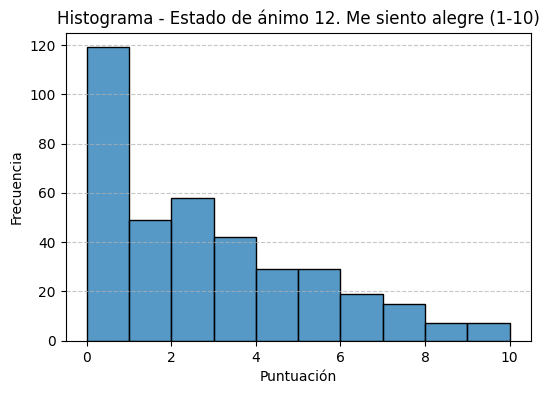

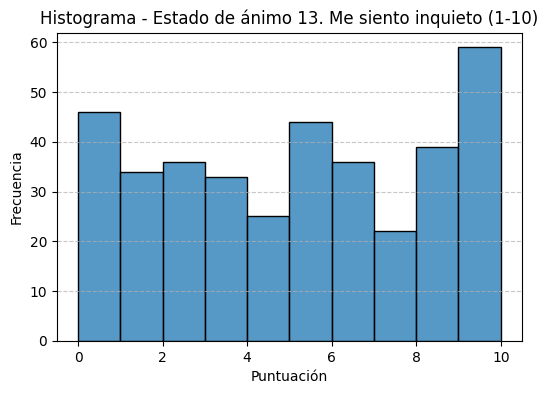

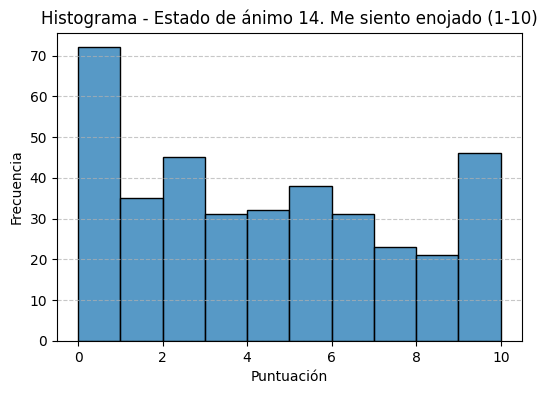

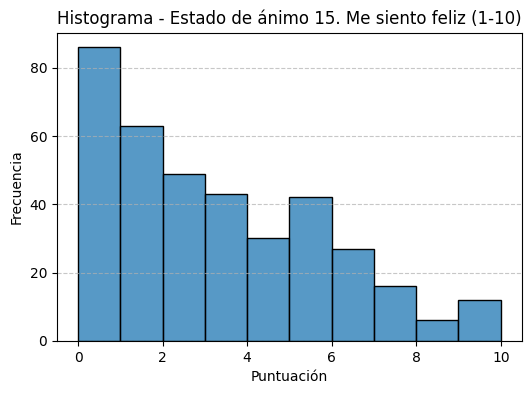

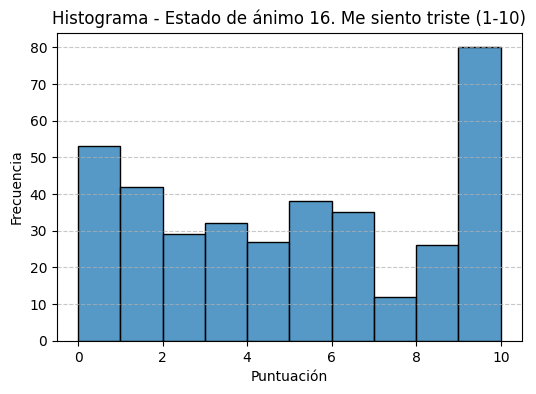

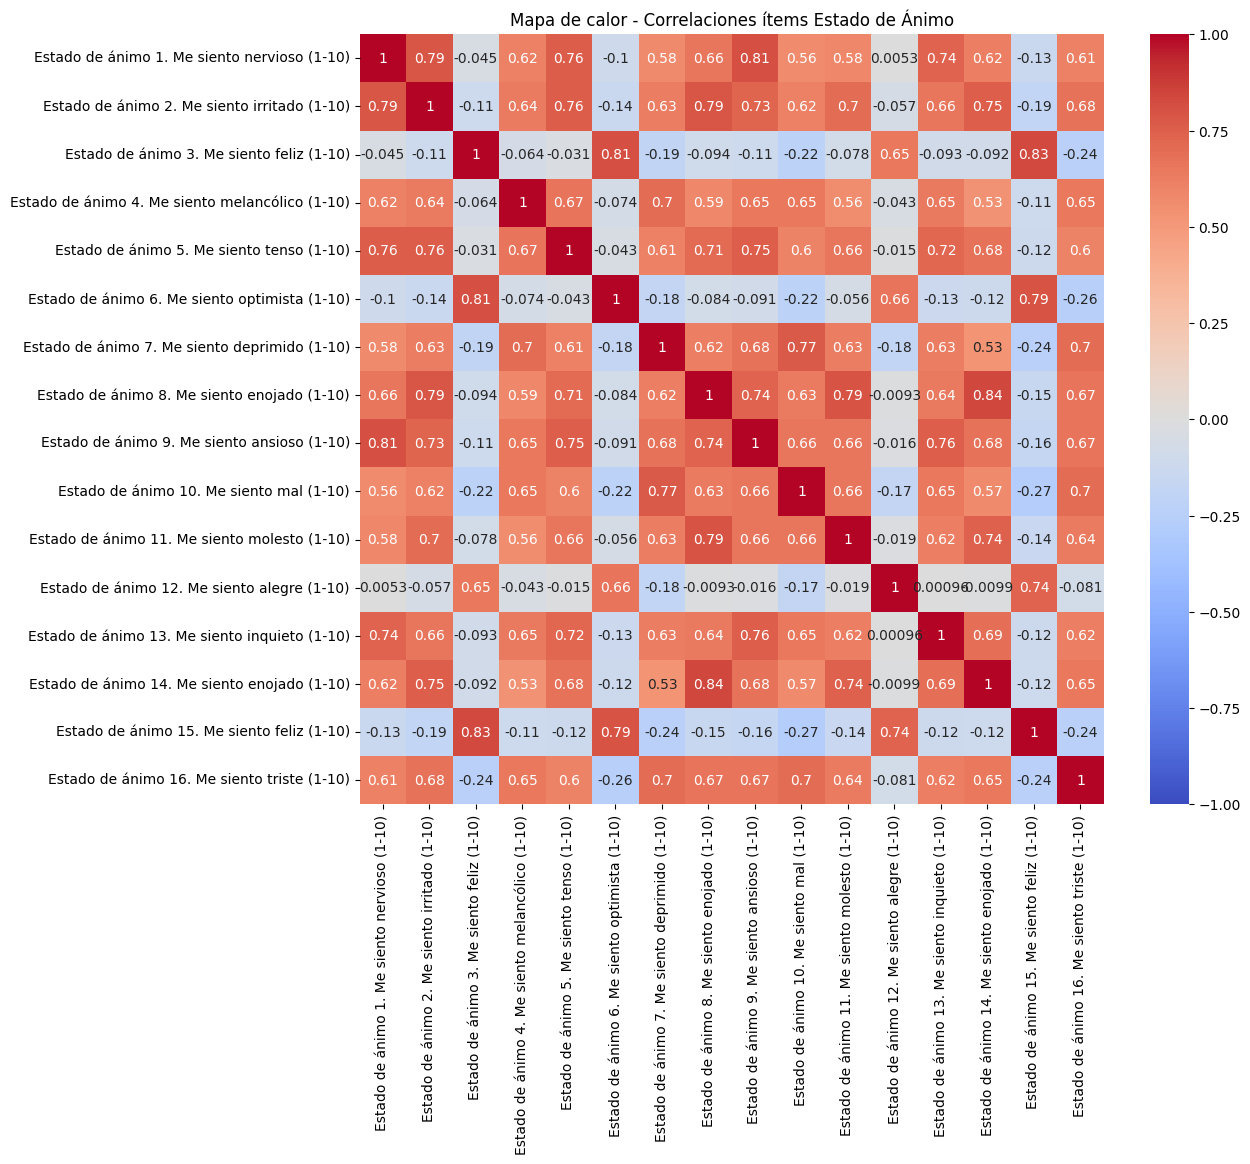

ANOVA resultado Estado de ánimo: F_onewayResult(statistic=np.float64(27.01460519918678), pvalue=np.float64(2.628579138184453e-74))
                                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                                          
                     group1                                          group2                     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------
   Estado de ánimo 1. Me siento nervioso (1-10)        Estado de ánimo 10. Me siento mal (1-10)   1.3449    0.0  0.5771  2.1127   True
   Estado de ánimo 1. Me siento nervioso (1-10)    Estado de ánimo 11. Me siento molesto (1-10)   0.6203 0.2872 -0.1475  1.3881  False
   Estado de ánimo 1. Me siento nervioso (1-10)     Estado de ánimo 12. Me siento alegre (1-10)  -1.8529    0.0 -2.6207 -1.0852   True
   Estado de ánimo 1. Me siento nervioso (1-10)   Estado de

In [4]:
# Seleccionar columnas de estado de ánimo
estado_cols = [col for col in df.columns if col.startswith("Estado de ánimo")]

# Histogramas
for col in estado_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=10, kde=False)
    plt.title(f"Histograma - {col}")
    plt.xlabel("Puntuación")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Mapa de calor
corr_estado = df[estado_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_estado, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de calor - Correlaciones ítems Estado de Ánimo")
plt.show()

# ANOVA y Tukey
anova_result_estado = f_oneway(*(df[col].dropna() for col in estado_cols))
print("ANOVA resultado Estado de ánimo:", anova_result_estado)

melted_estado = df[estado_cols].melt(var_name="Ítem", value_name="Puntuación")
tukey_result_estado = pairwise_tukeyhsd(endog=melted_estado["Puntuación"],
                                        groups=melted_estado["Ítem"],
                                        alpha=0.05)
print(tukey_result_estado)


5️⃣ Clasificación síntomas persistentes por ítems de fatiga y estado de ánimo

In [5]:
# Seleccionar columnas de síntomas persistentes
sintomas_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas")]

# Agrupar por presencia de cada síntoma y obtener medias
for sintoma in sintomas_cols:
    print(f"\n===== {sintoma} =====")
    medias_fatiga = df.groupby(df[sintoma])[fatiga_cols].mean()
    medias_estado = df.groupby(df[sintoma])[estado_cols].mean()
    print("Medias Fatiga:\n", medias_fatiga)
    print("Medias Estado de Ánimo:\n", medias_estado)



===== ¿Qué tipo de síntomas persistentes tiene o ha tenido? Neurológicos =====
Medias Fatiga:
                                                     Fatiga 1. Mi motivación es menor cuando estoy fatigado (1-7)  \
¿Qué tipo de síntomas persistentes tiene o ha t...                                                                 
0                                                                                            5.376623              
1                                                                                            5.831650              

                                                    Fatiga 2. El ejercicio me fatiga (1-7)  \
¿Qué tipo de síntomas persistentes tiene o ha t...                                           
0                                                                                 5.337662   
1                                                                                 5.723906   

                                                    Fatiga 3. 

6️⃣ Repetir todo filtrando pacientes con ≥3 síntomas persistentes

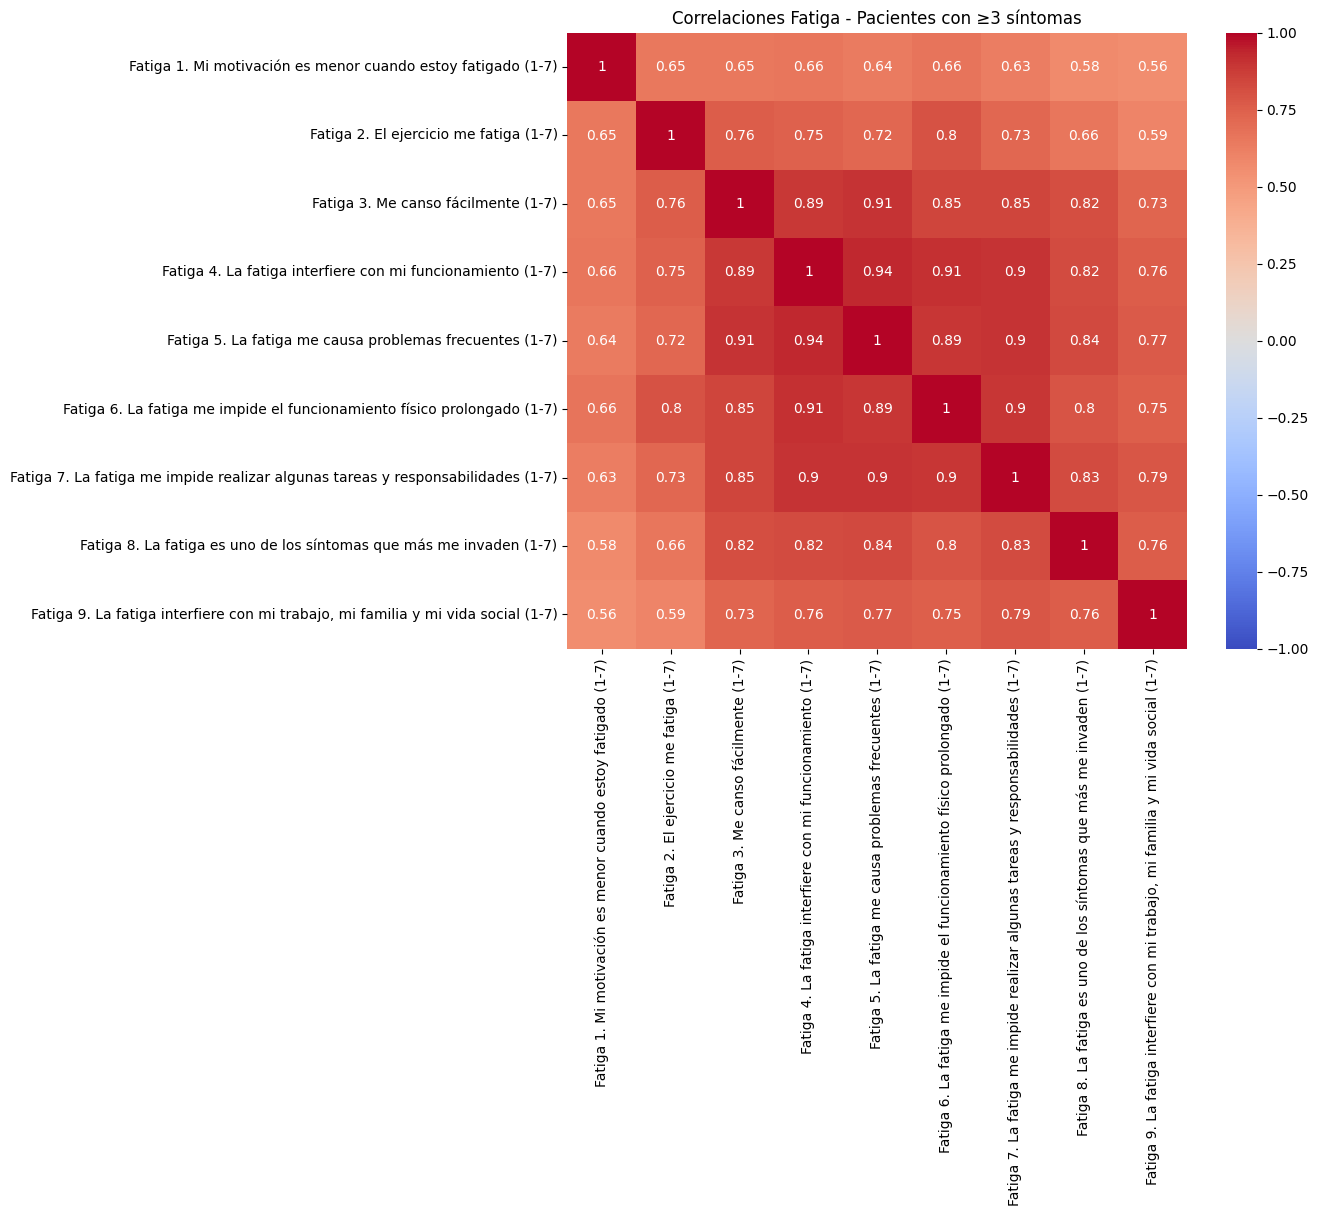

In [6]:
# Calcular número de síntomas por paciente
df["num_sintomas"] = df[sintomas_cols].sum(axis=1)

# Filtrar
df_filtrado = df[df["num_sintomas"] >= 3]

# Ejemplo: Mapa de calor de fatiga en pacientes con >=3 síntomas
corr_fatiga_filtrado = df_filtrado[fatiga_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_fatiga_filtrado, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlaciones Fatiga - Pacientes con ≥3 síntomas")
plt.show()

# Puedes repetir aquí cualquier otro análisis (histogramas, ANOVA, etc.) usando df_filtrado


Entonces vamos a ampliar los scripts 5️⃣ y 6️⃣ para que además de mostrar las medias, generen gráficos comparativos claros por tipo de síntoma, tanto en el conjunto general como en el filtrado de pacientes con ≥3 síntomas.

5️⃣ Clasificación síntomas persistentes con gráficos comparativos

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


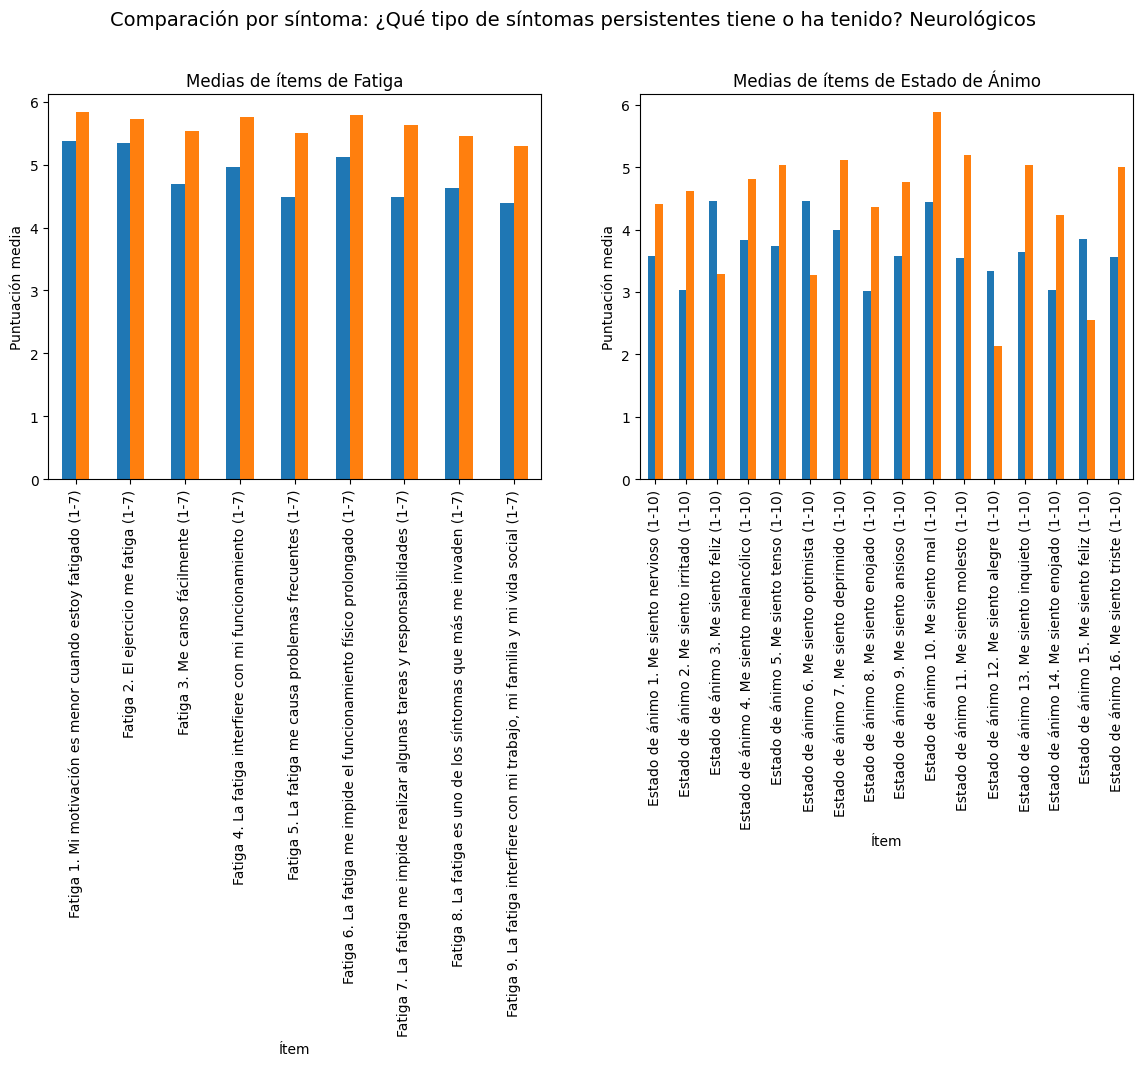

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


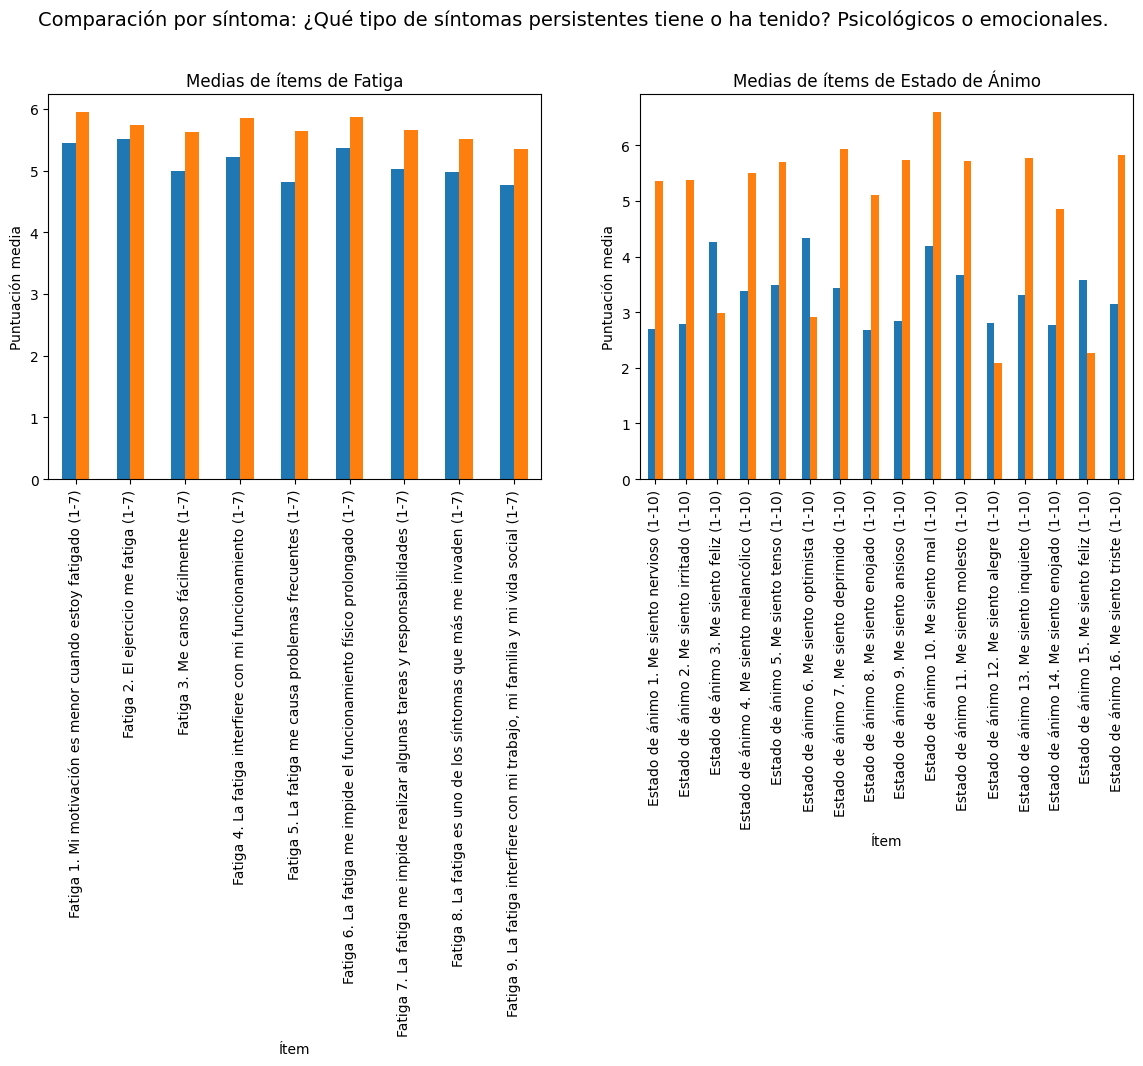

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


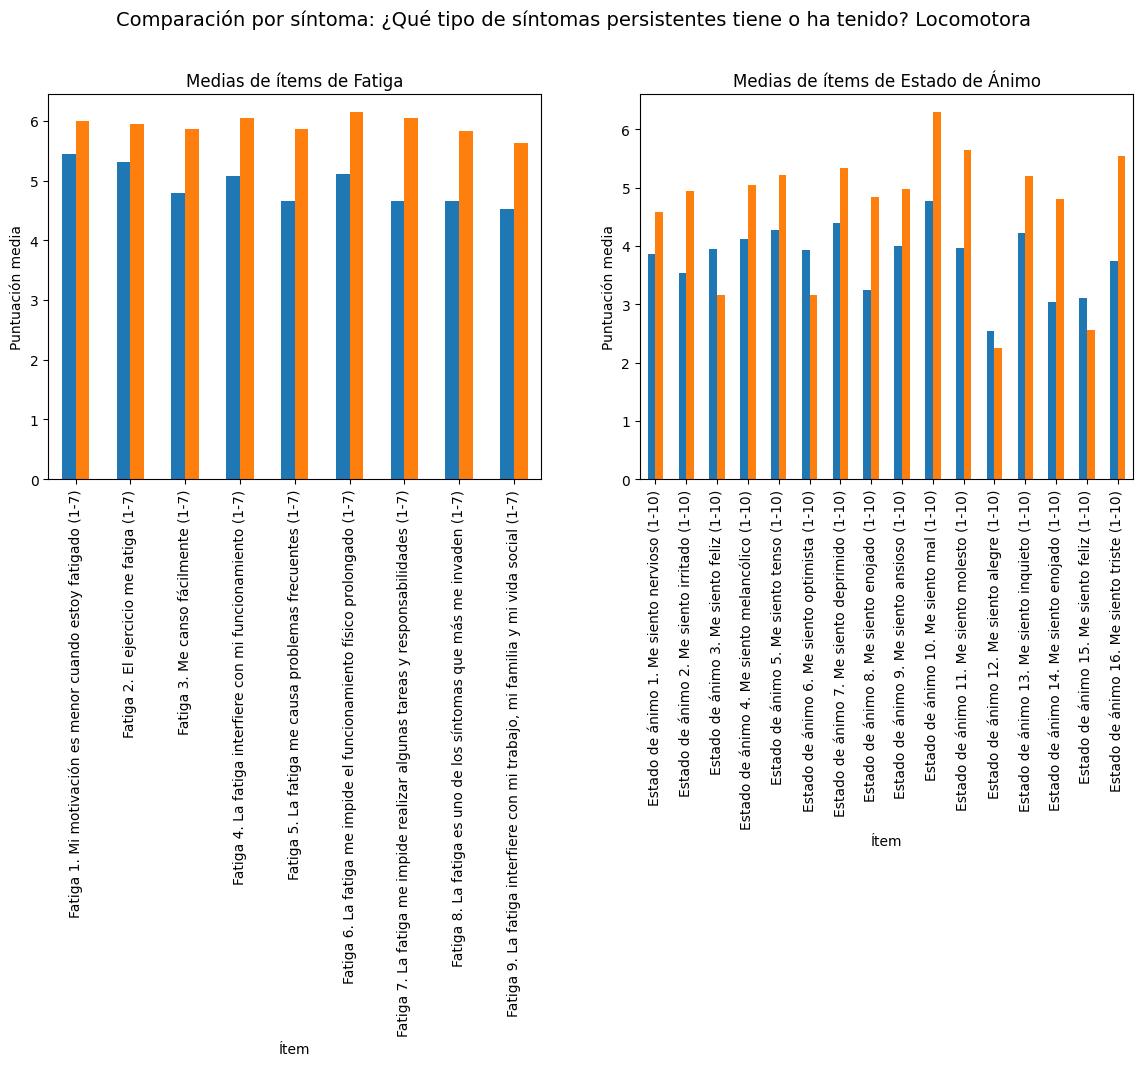

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


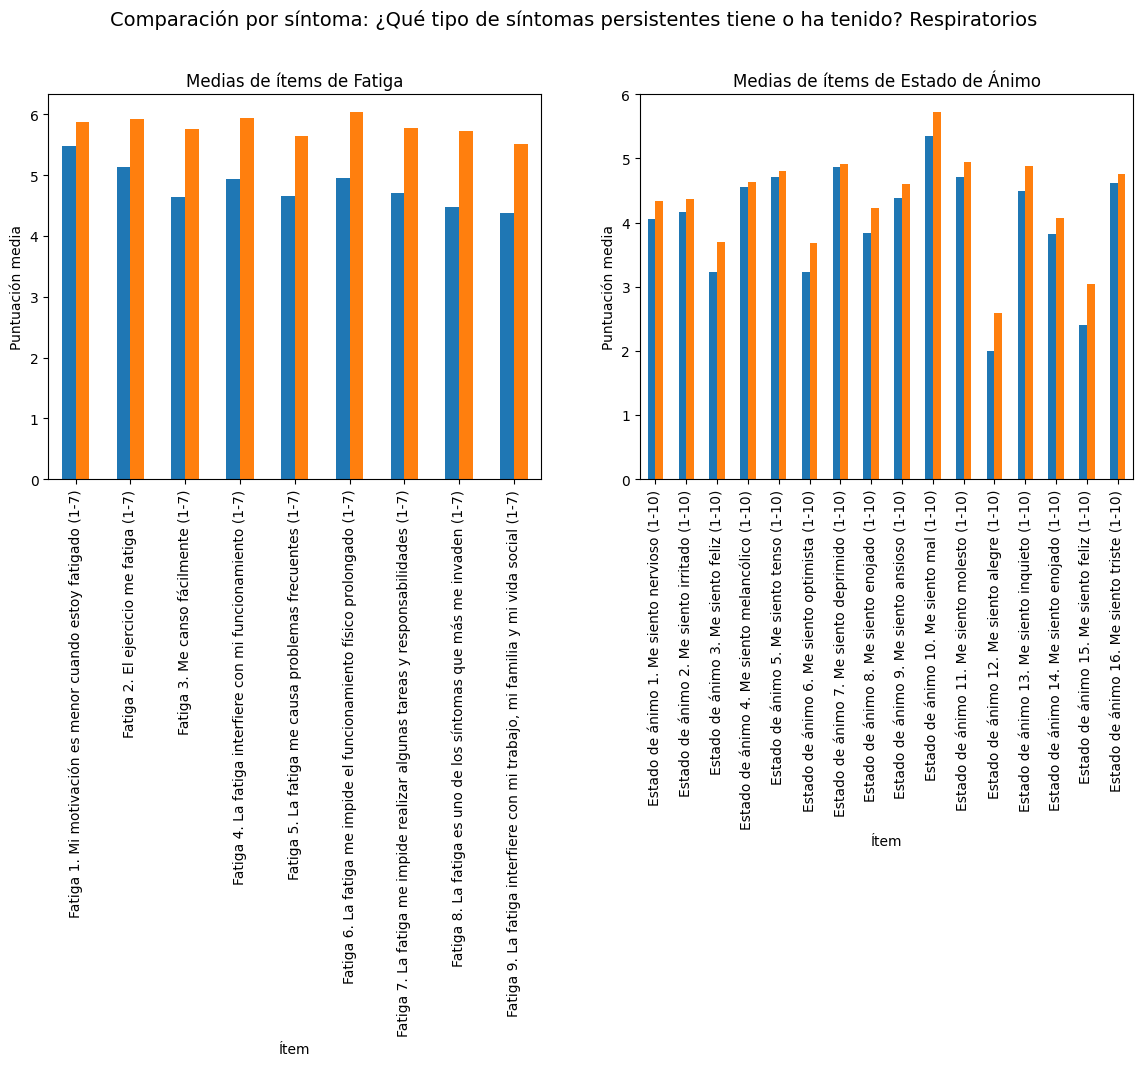

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


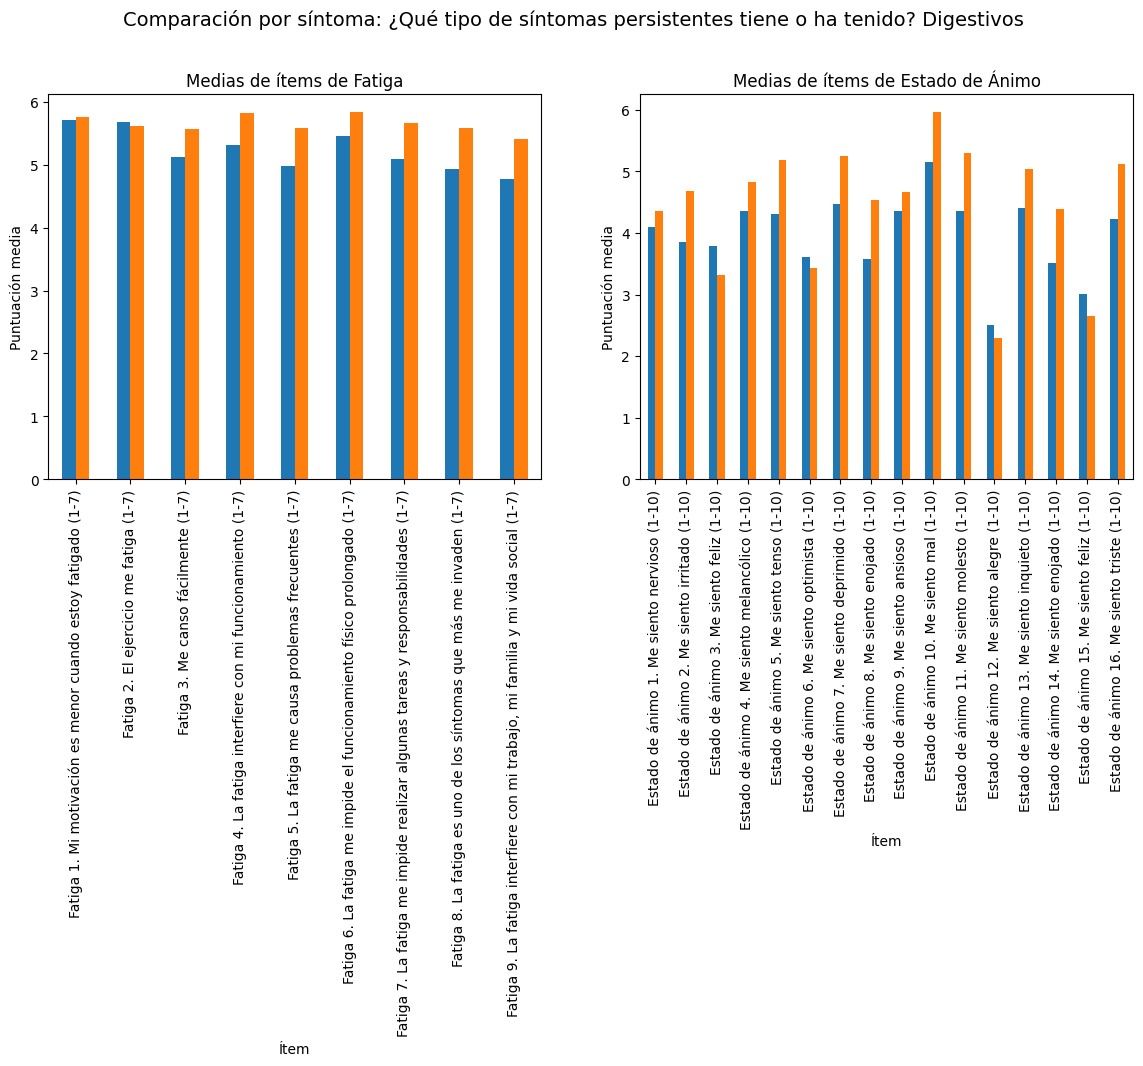

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


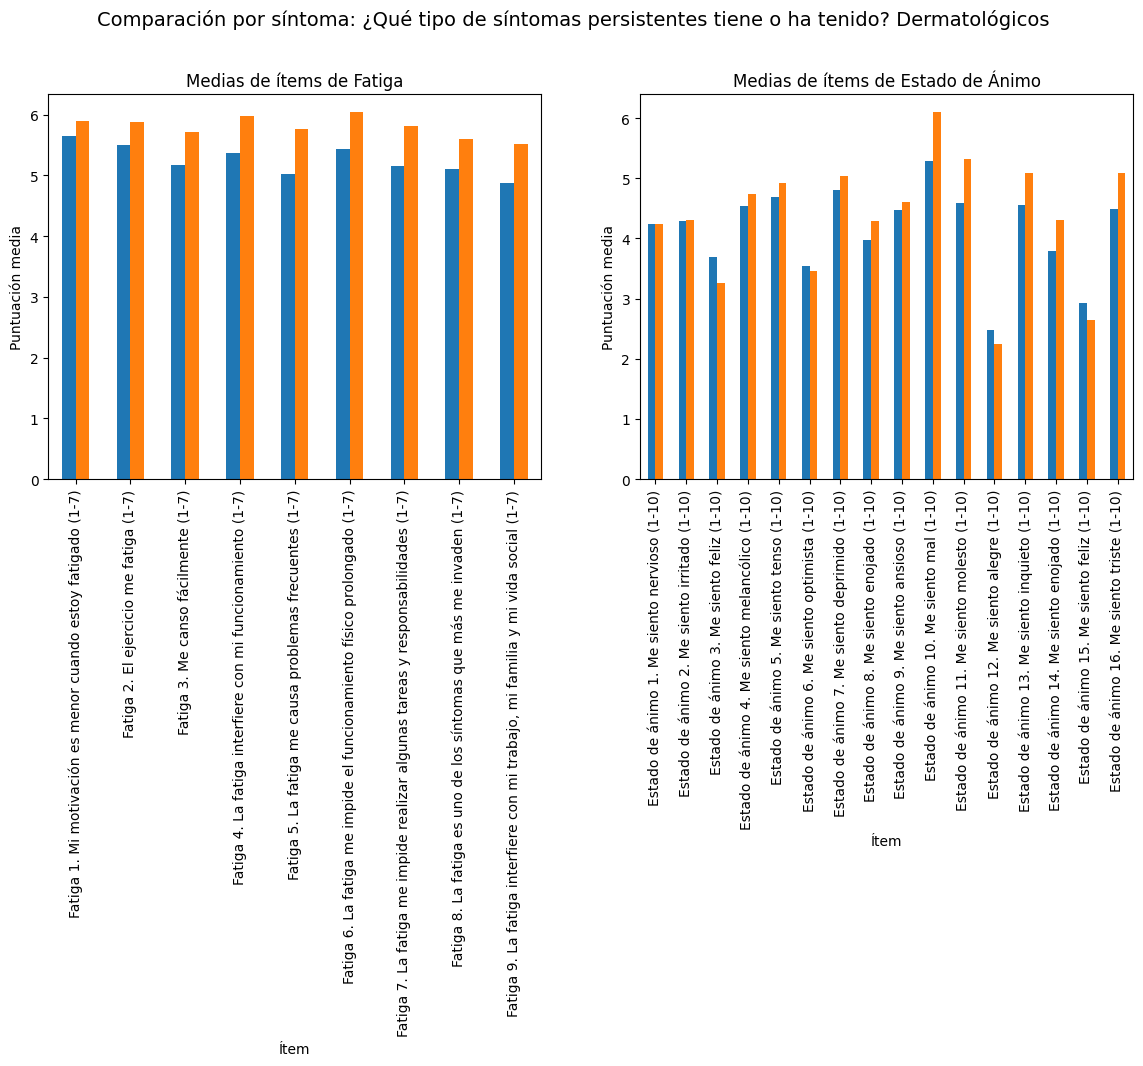

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


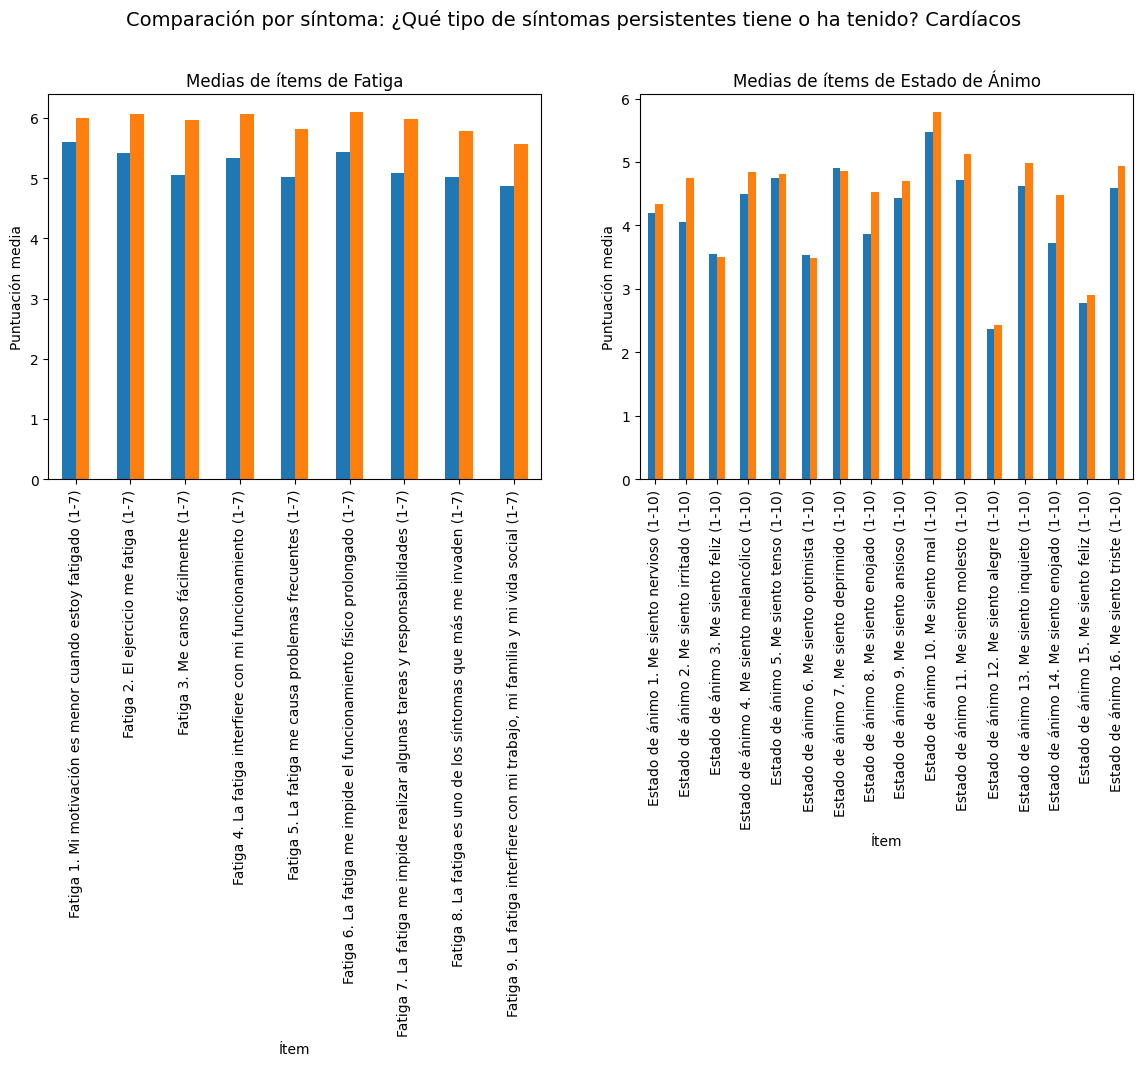

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


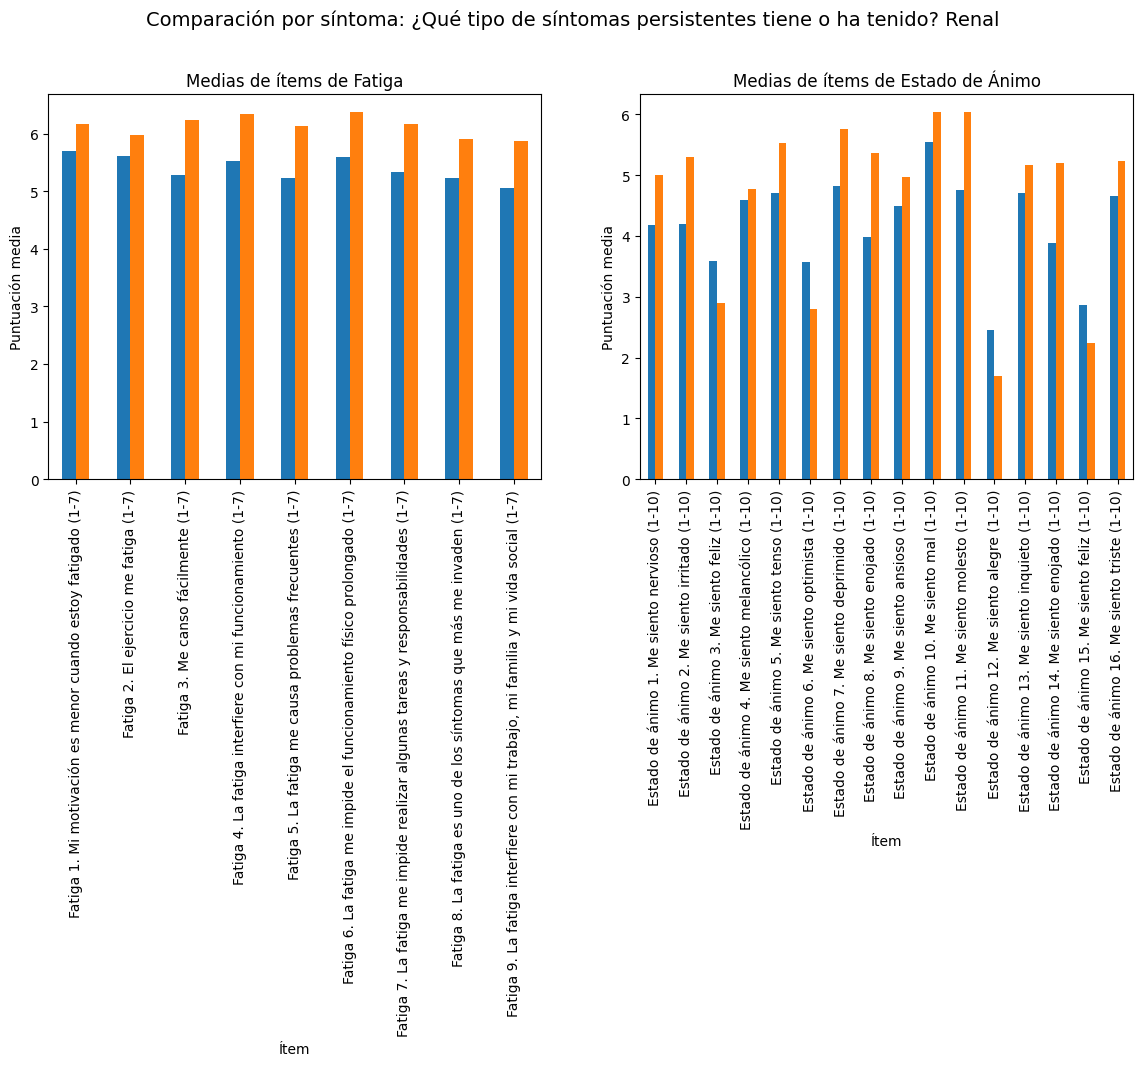

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


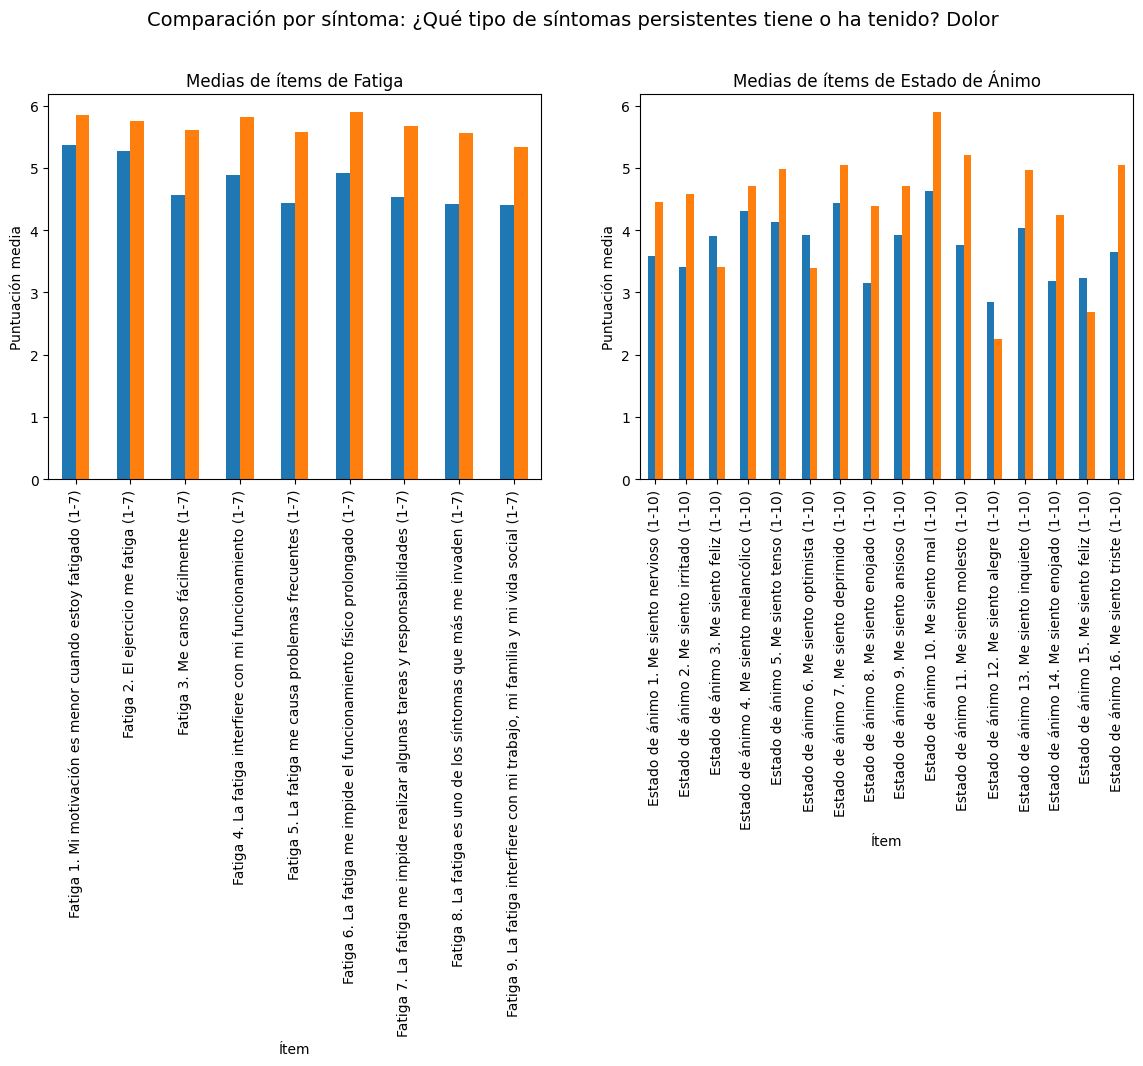

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\3264077237.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


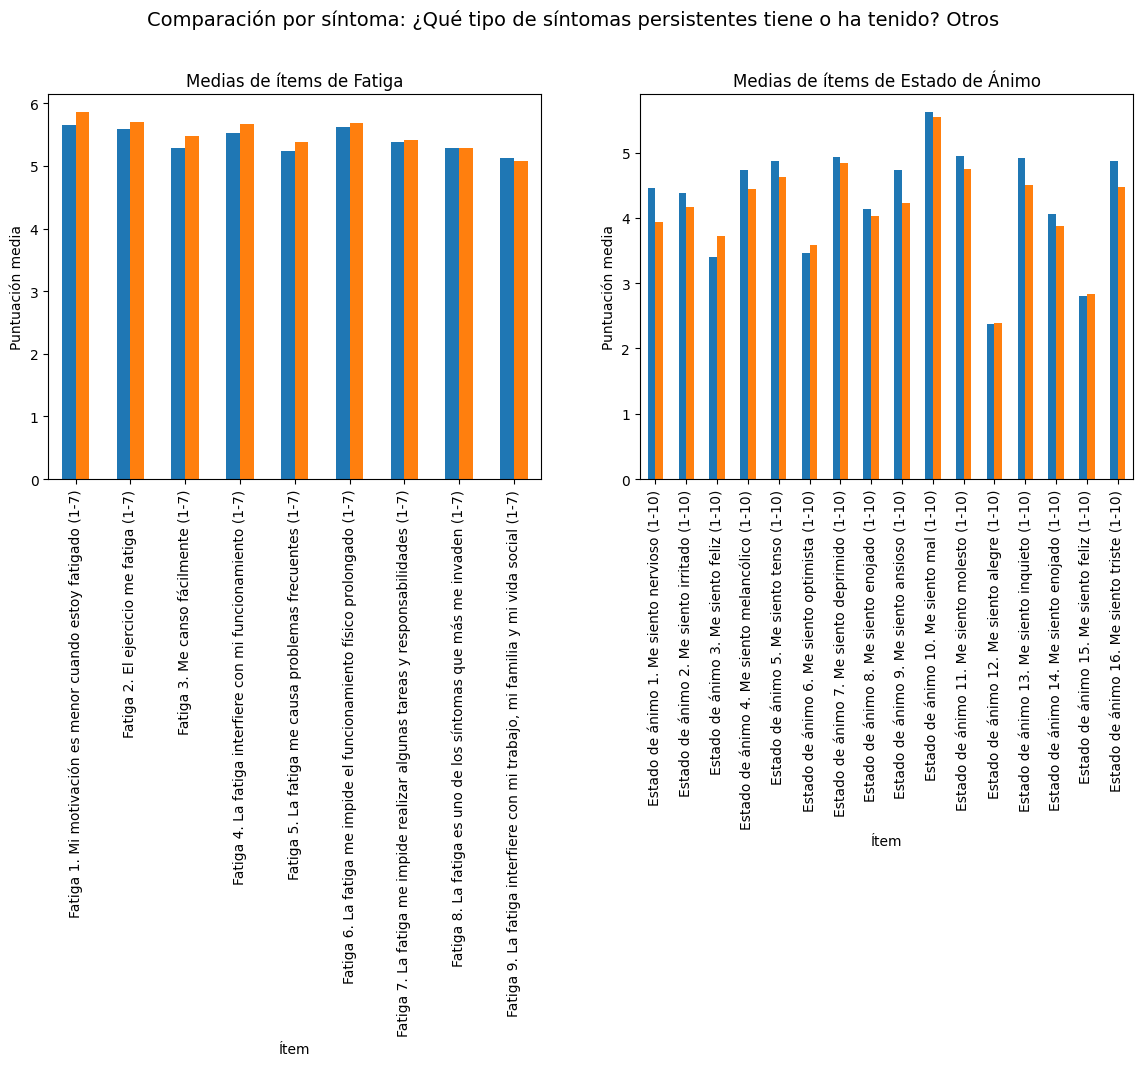

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "percepcion_covid_persistente.xlsx"
df = pd.read_excel(file_path, sheet_name="Respuestas de formulario 1")

# Columnas
fatiga_cols = [col for col in df.columns if col.startswith("Fatiga")]
estado_cols = [col for col in df.columns if col.startswith("Estado de ánimo")]
sintomas_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas")]

# Gráficos comparativos por síntoma
for sintoma in sintomas_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Comparación por síntoma: {sintoma}", fontsize=14, y=1.05)
    
    # Fatiga
    fatiga_medias = df.groupby(df[sintoma])[fatiga_cols].mean().T
    fatiga_medias.plot(kind='bar', ax=axes[0], legend=False)
    axes[0].set_title("Medias de ítems de Fatiga")
    axes[0].set_ylabel("Puntuación media")
    axes[0].set_xlabel("Ítem")
    
    # Estado de ánimo
    estado_medias = df.groupby(df[sintoma])[estado_cols].mean().T
    estado_medias.plot(kind='bar', ax=axes[1], legend=False)
    axes[1].set_title("Medias de ítems de Estado de Ánimo")
    axes[1].set_ylabel("Puntuación media")
    axes[1].set_xlabel("Ítem")
    
    plt.tight_layout()
    plt.show()


6️⃣ Clasificación síntomas persistentes (solo pacientes con ≥3 síntomas)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


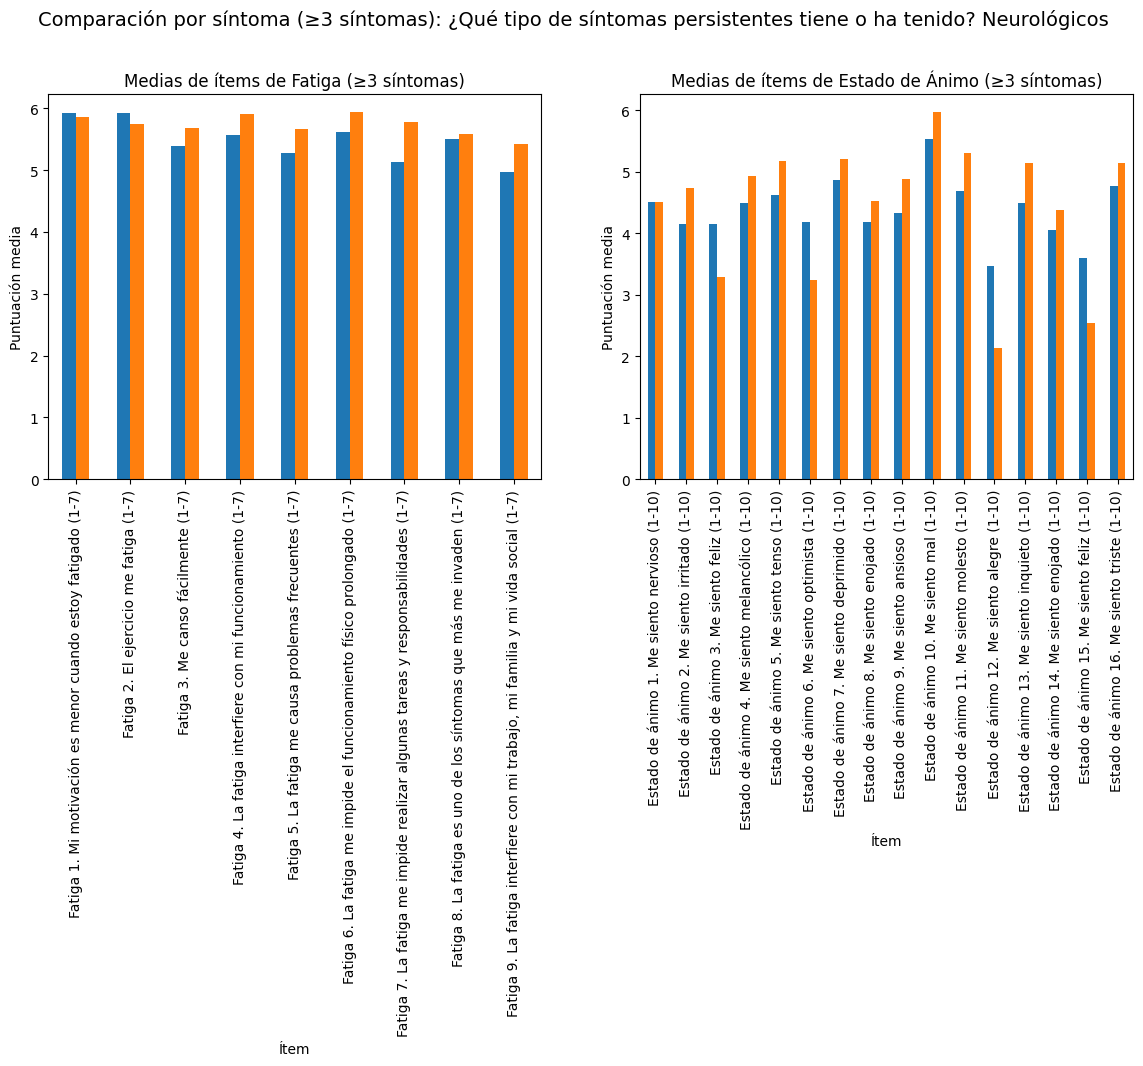

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


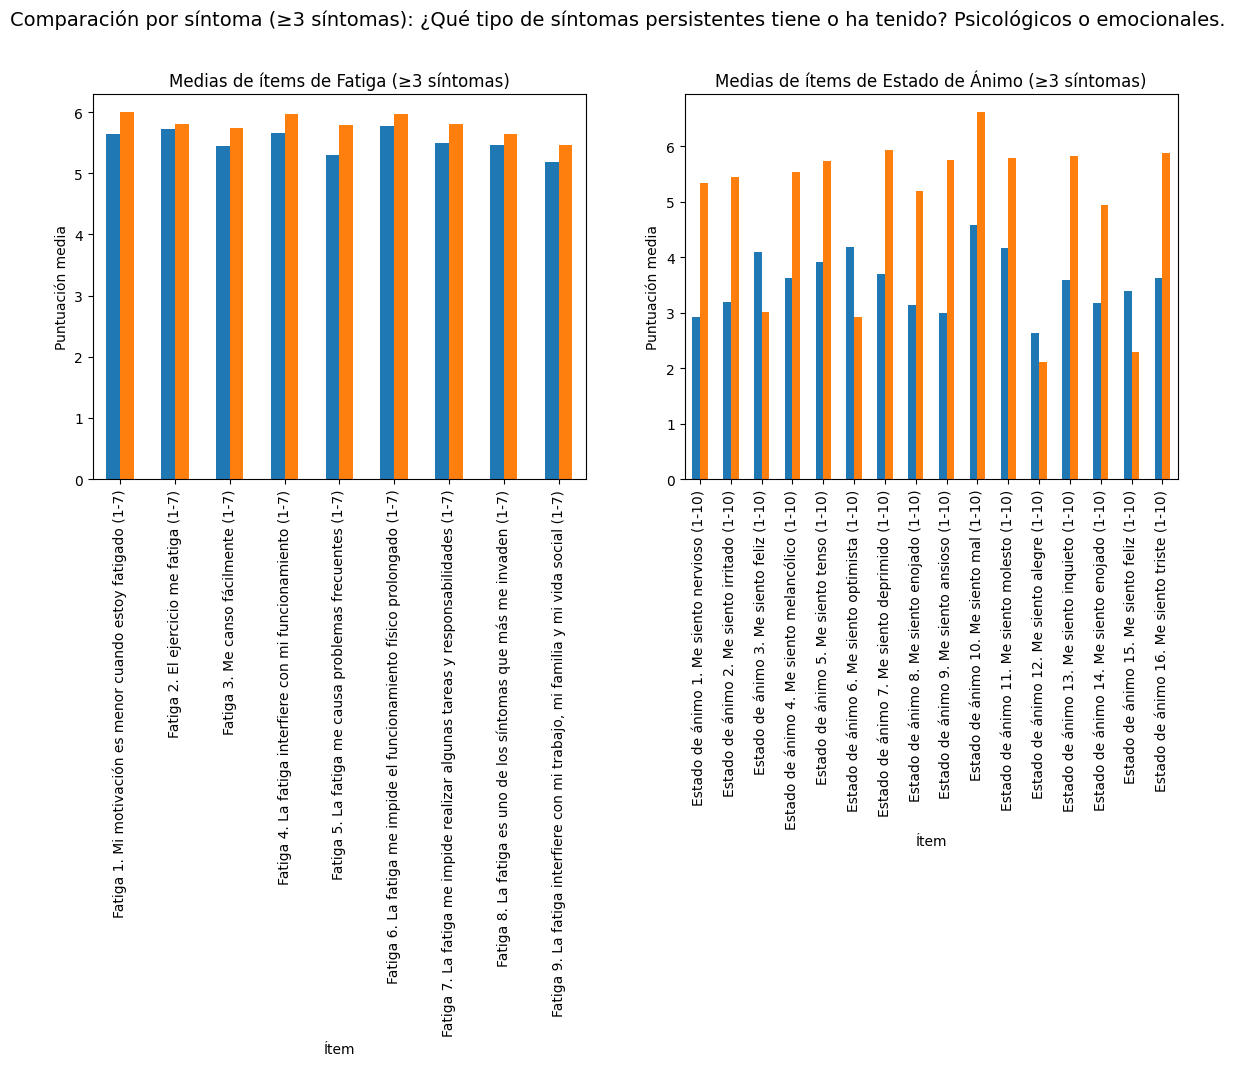

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


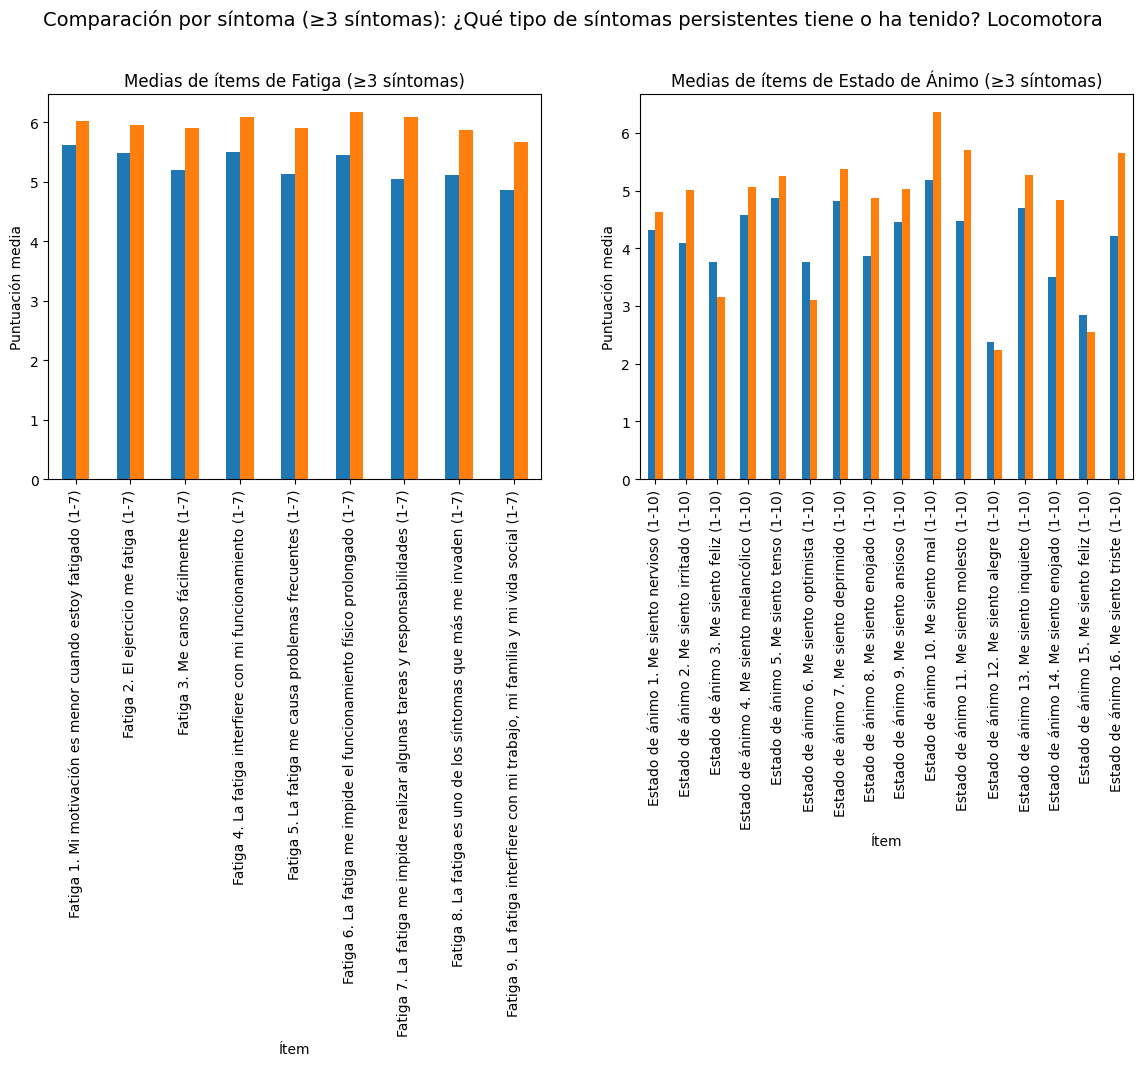

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


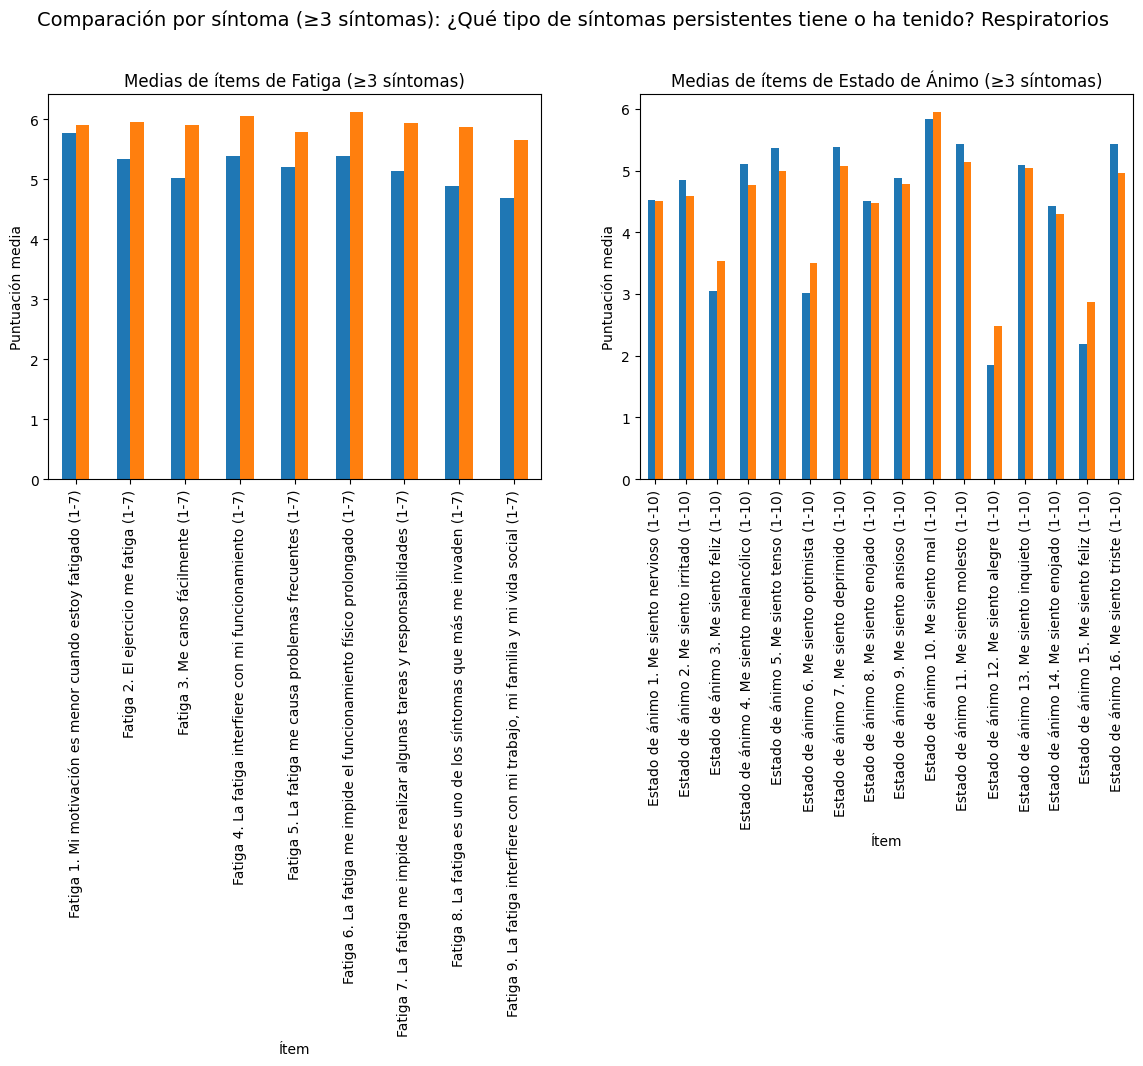

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


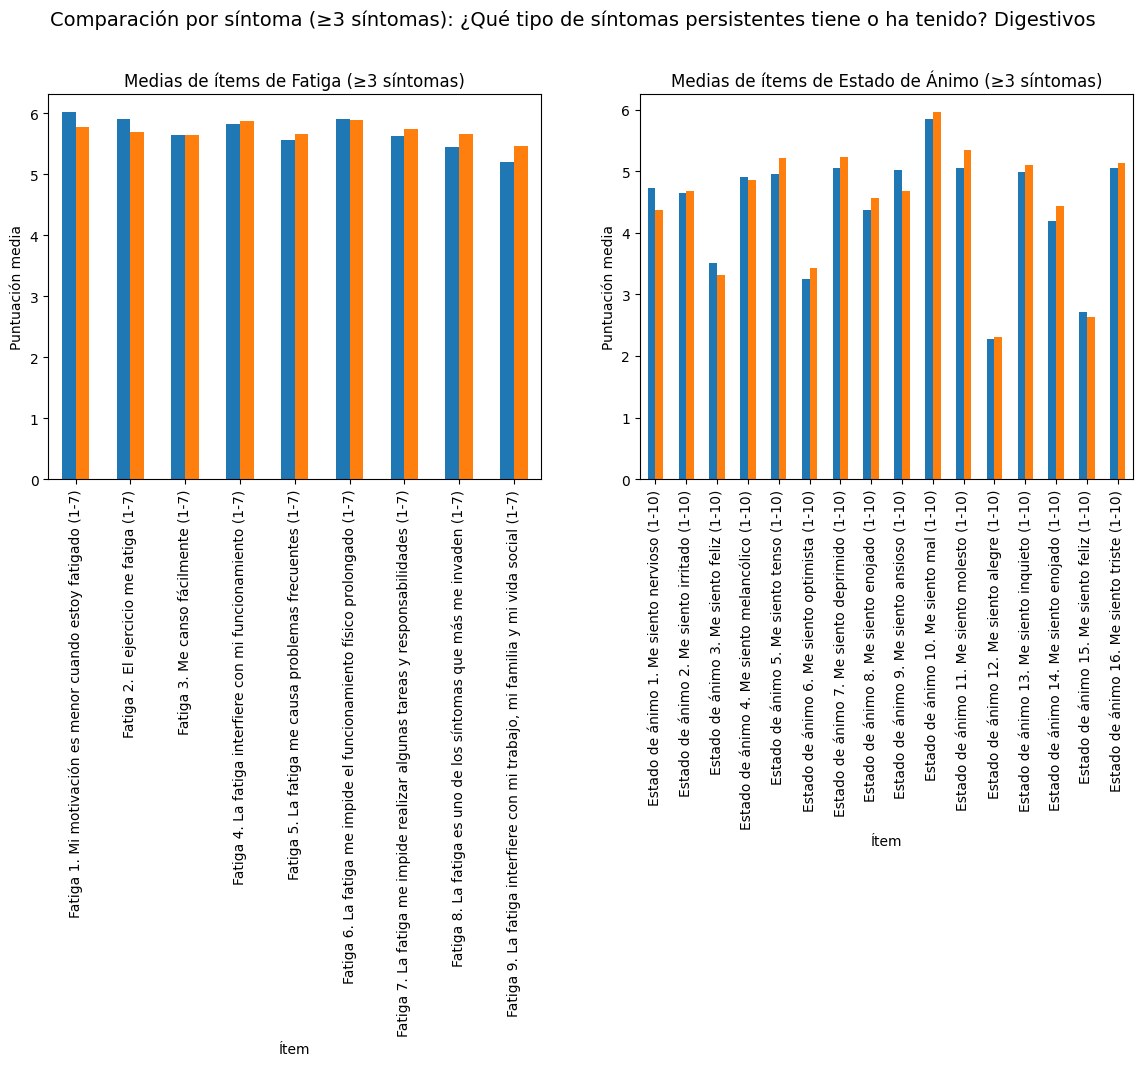

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


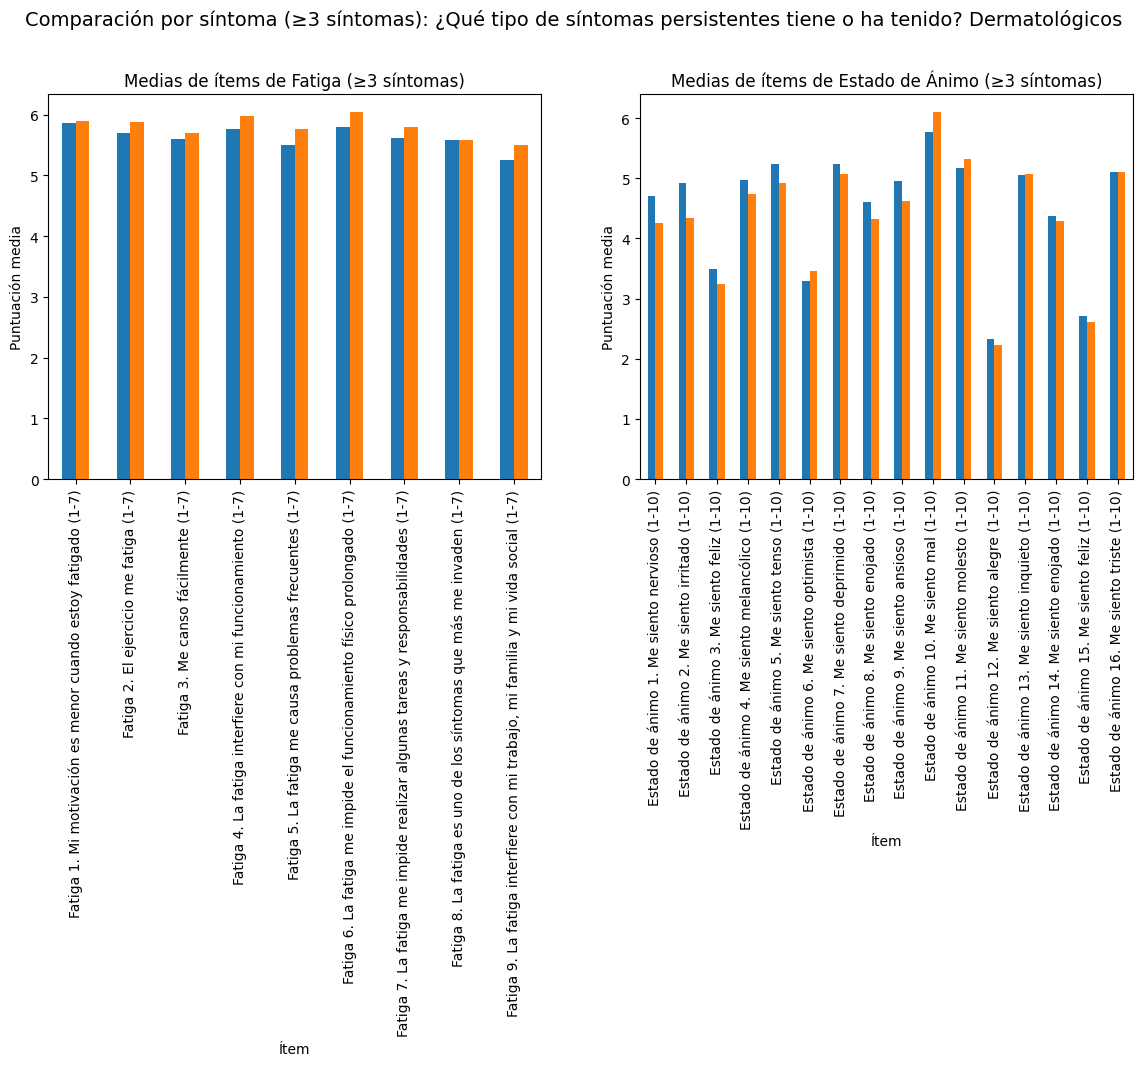

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


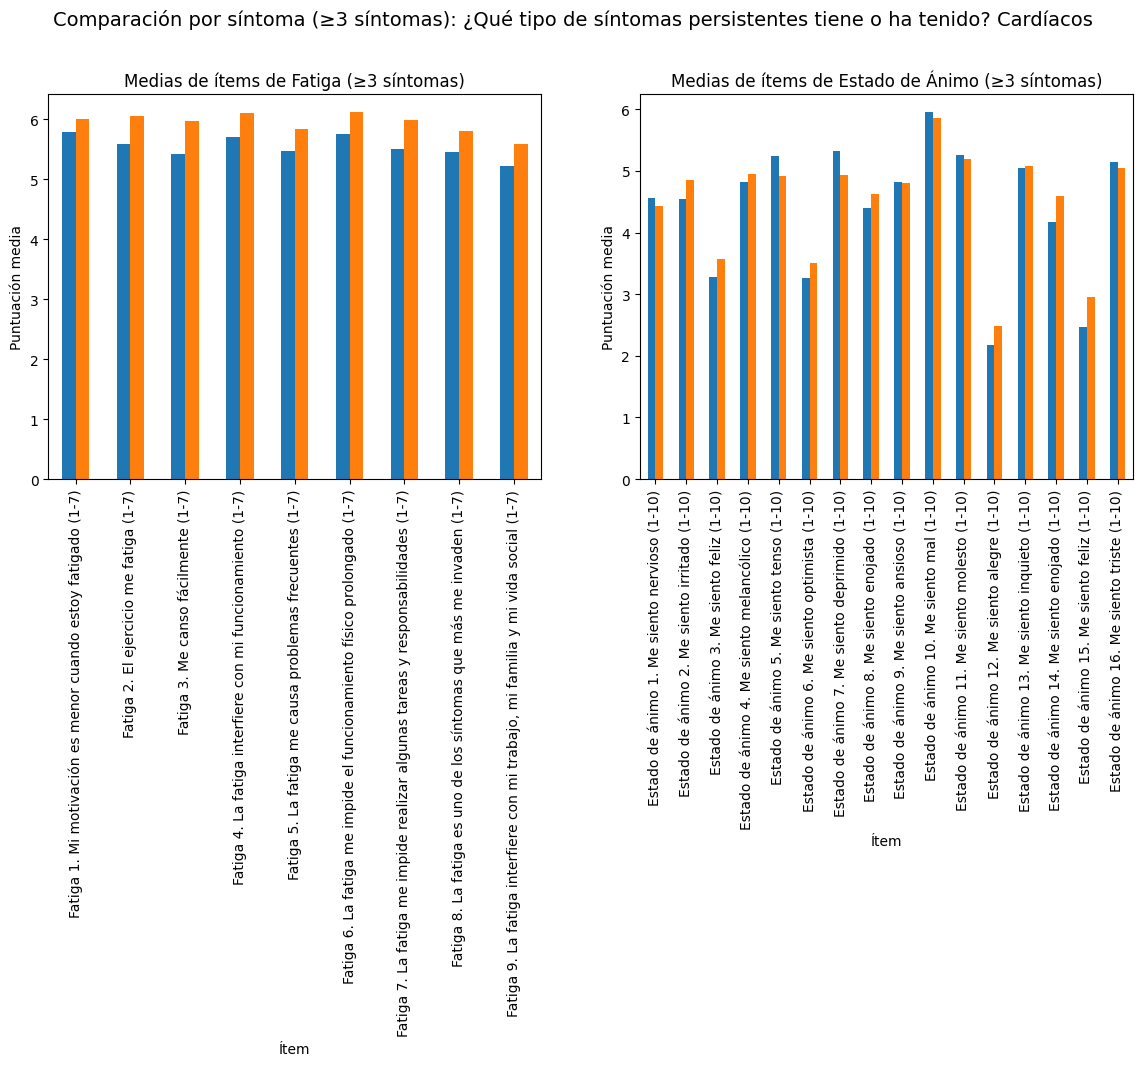

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


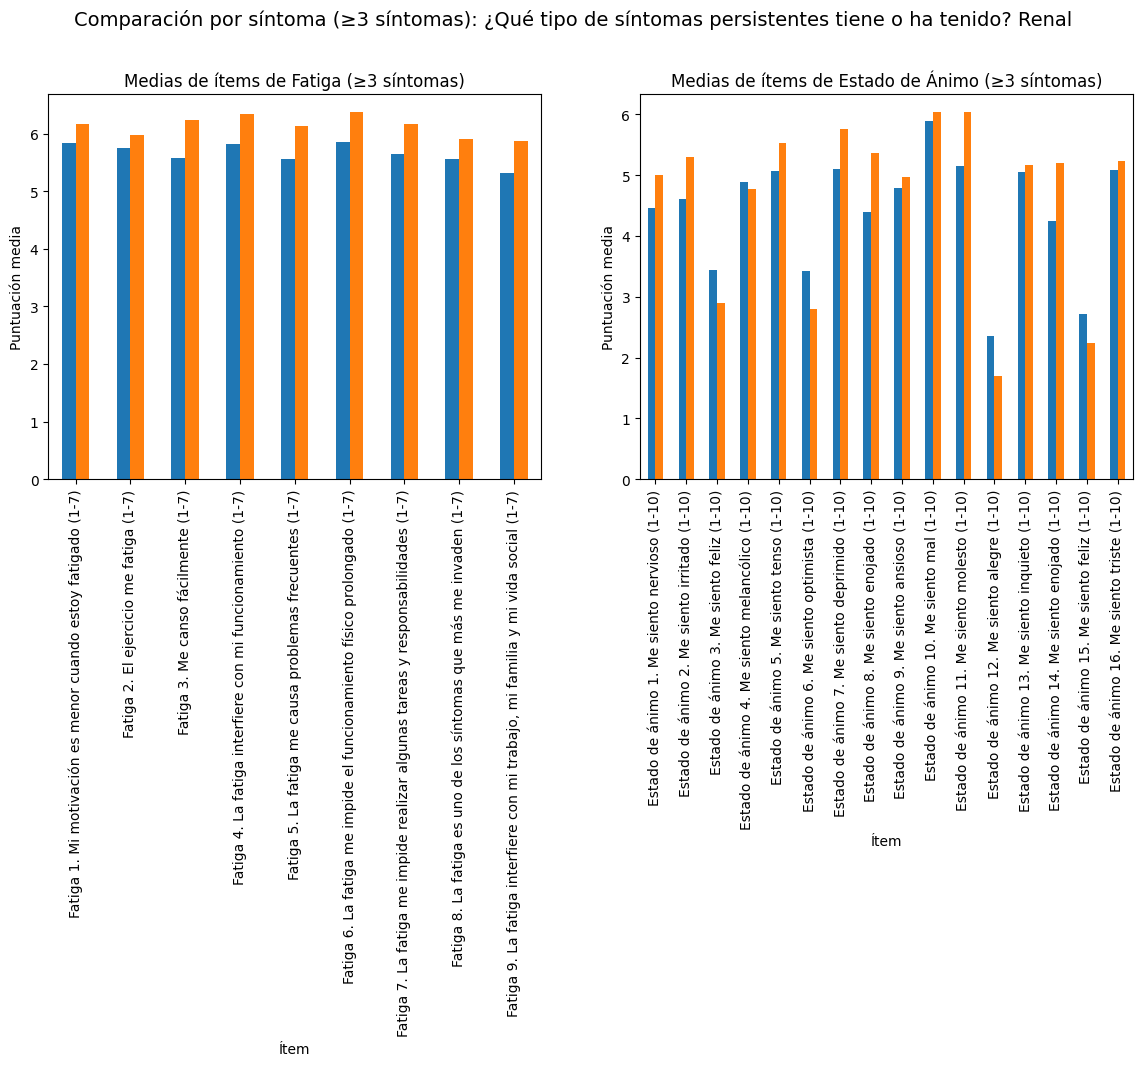

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


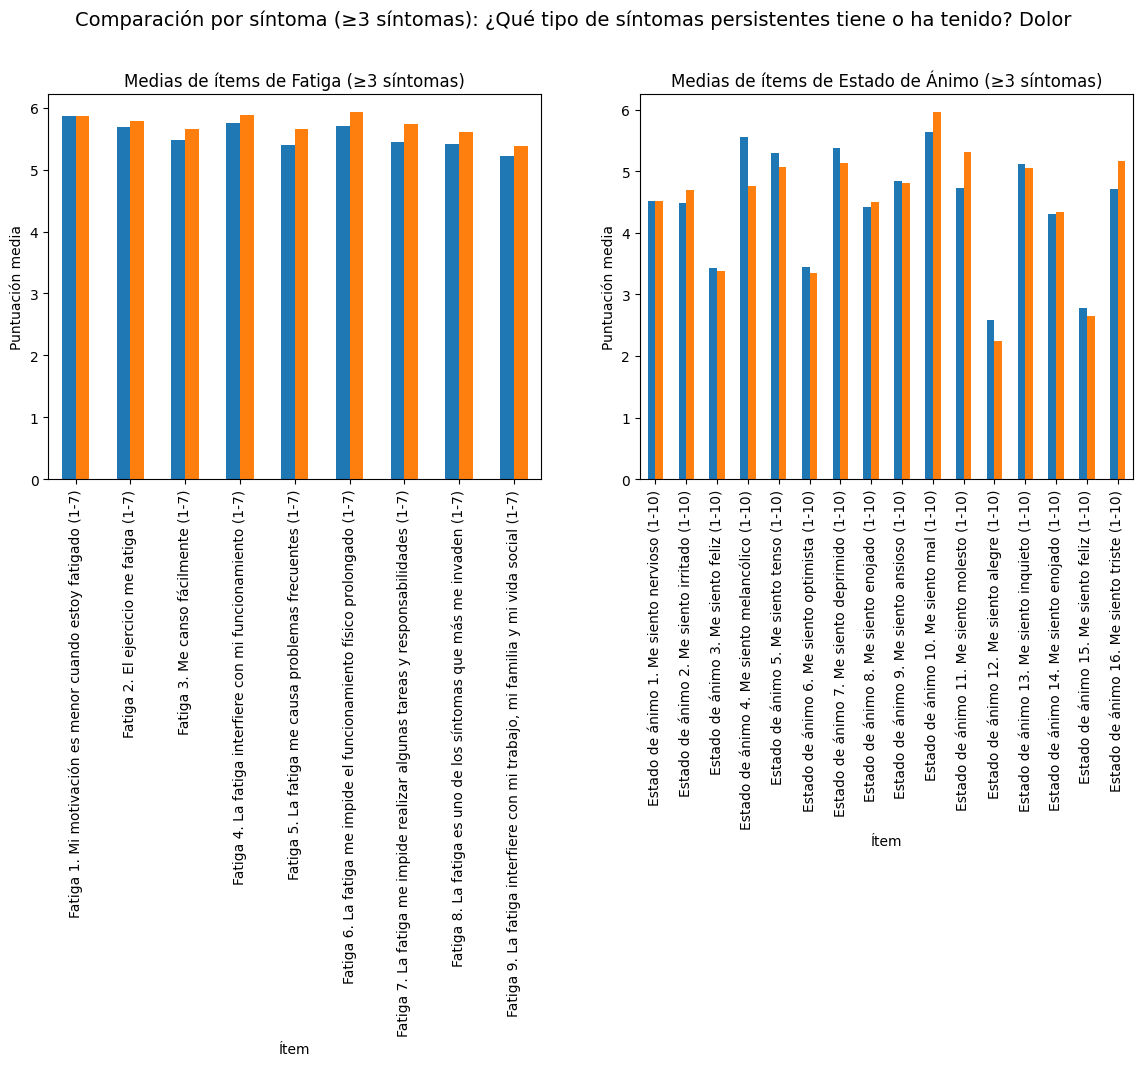

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\2628009038.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


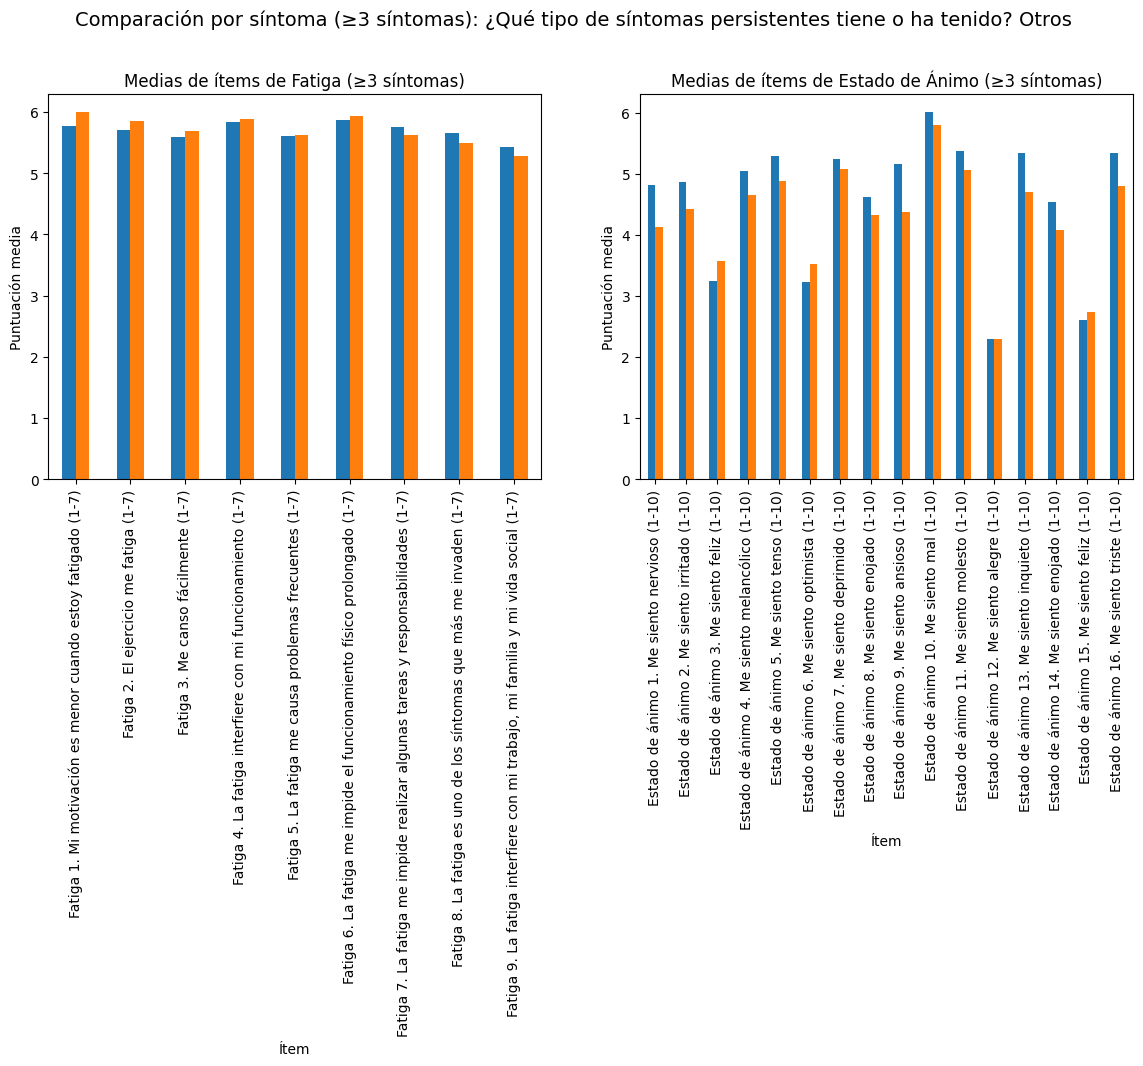

In [8]:
# Calcular número de síntomas
df["num_sintomas"] = df[sintomas_cols].sum(axis=1)

# Filtrar pacientes con ≥3 síntomas
df_filtrado = df[df["num_sintomas"] >= 3]

# Gráficos comparativos por síntoma en el filtrado
for sintoma in sintomas_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Comparación por síntoma (≥3 síntomas): {sintoma}", fontsize=14, y=1.05)
    
    # Fatiga
    fatiga_medias = df_filtrado.groupby(df_filtrado[sintoma])[fatiga_cols].mean().T
    fatiga_medias.plot(kind='bar', ax=axes[0], legend=False)
    axes[0].set_title("Medias de ítems de Fatiga (≥3 síntomas)")
    axes[0].set_ylabel("Puntuación media")
    axes[0].set_xlabel("Ítem")
    
    # Estado de ánimo
    estado_medias = df_filtrado.groupby(df_filtrado[sintoma])[estado_cols].mean().T
    estado_medias.plot(kind='bar', ax=axes[1], legend=False)
    axes[1].set_title("Medias de ítems de Estado de Ánimo (≥3 síntomas)")
    axes[1].set_ylabel("Puntuación media")
    axes[1].set_xlabel("Ítem")
    
    plt.tight_layout()
    plt.show()


### DATOS PERCEPCION: 3 O MAS SINTOMAS

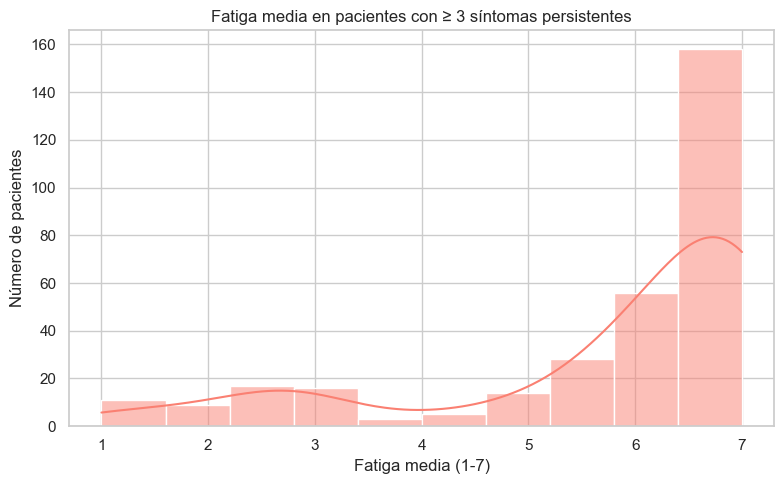

Top 10 combinaciones de síntomas más frecuentes:

Síntomas combinados
Neurológicos, emocionales., Locomotora, Respiratorios, Digestivos, Dermatológicos, Cardíacos, Dolor           14
Neurológicos, emocionales., Locomotora, Respiratorios, Digestivos, Dermatológicos, Cardíacos, Dolor, Otros    10
Neurológicos, emocionales., Locomotora, Respiratorios, Digestivos, Dermatológicos, Dolor                       8
Neurológicos, emocionales., Locomotora, Respiratorios, Digestivos, Cardíacos, Dolor, Otros                     6
Neurológicos, emocionales., Locomotora, Digestivos, Dermatológicos, Dolor, Otros                               6
Neurológicos, emocionales., Locomotora, Respiratorios, Cardíacos, Dolor                                        5
Neurológicos, emocionales., Respiratorios, Dolor                                                               5
Neurológicos, emocionales., Locomotora, Respiratorios, Dermatológicos, Dolor, Otros                            5
Neurológicos, Locomotora, 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo
file_path =(r"C:\Users\USUARIO\Dropbox\Mi PC (i3)\Desktop\datos covid 19\percepcion_covid_persistente.xlsx") 
excel_data = pd.ExcelFile(file_path)
df = excel_data.parse('Respuestas de formulario 1')

# Identificar columnas de síntomas persistentes
sintoma_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas persistentes")]
df_sintomas = df[sintoma_cols].apply(pd.to_numeric, errors='coerce')

# Contar cuántos síntomas tiene cada paciente
df['Nº de síntomas'] = df_sintomas.sum(axis=1)

# Filtrar pacientes con 3 o más síntomas
df_multisintoma = df[df['Nº de síntomas'] >= 3].copy()

# Calcular fatiga media
fatiga_cols = [col for col in df.columns if col.startswith("Fatiga")]
df_fatiga = df[fatiga_cols].apply(pd.to_numeric, errors='coerce')
df_multisintoma['Fatiga media'] = df_fatiga.loc[df_multisintoma.index].mean(axis=1)

# Histograma de fatiga media para pacientes con 3 o más síntomas
plt.figure(figsize=(8, 5))
sns.histplot(df_multisintoma['Fatiga media'], bins=10, kde=True, color='salmon')
plt.title('Fatiga media en pacientes con ≥ 3 síntomas persistentes')
plt.xlabel('Fatiga media (1-7)')
plt.ylabel('Número de pacientes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Opcional: Ver combinaciones más comunes de síntomas
df_multisintoma['Síntomas combinados'] = df_sintomas.loc[df_multisintoma.index].apply(
    lambda row: ', '.join([col.split()[-1] for col, val in row.items() if val == 1]), axis=1
)

# Mostrar las combinaciones más frecuentes
combinaciones_frecuentes = df_multisintoma['Síntomas combinados'].value_counts().head(10)
print("Top 10 combinaciones de síntomas más frecuentes:\n")
print(combinaciones_frecuentes)


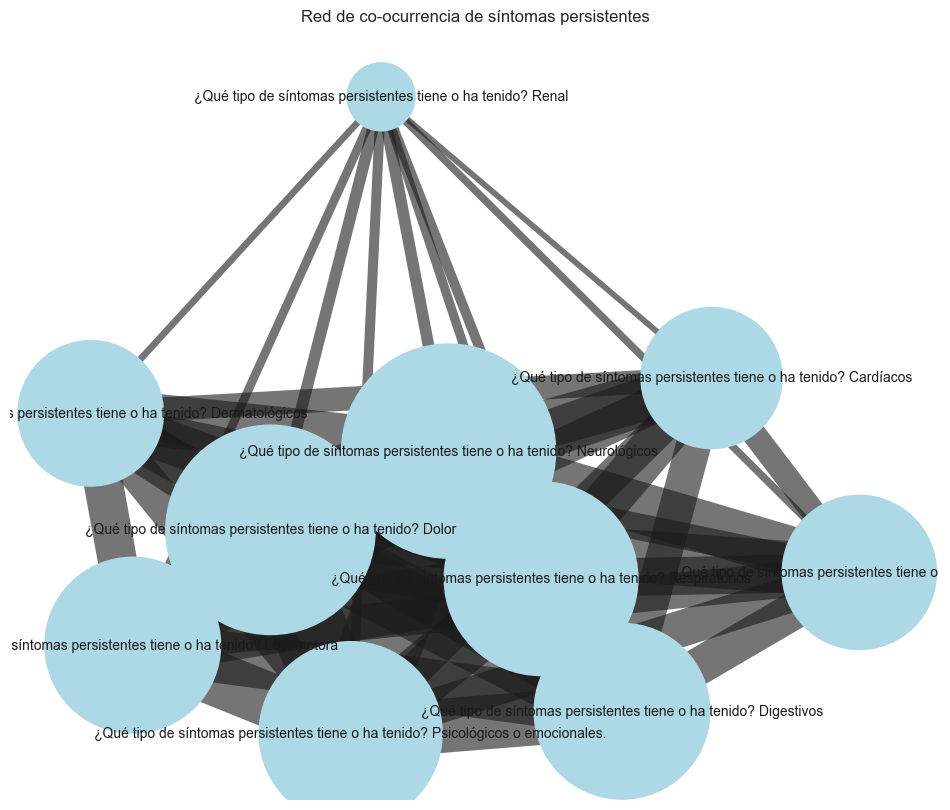

c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\USUARIO\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


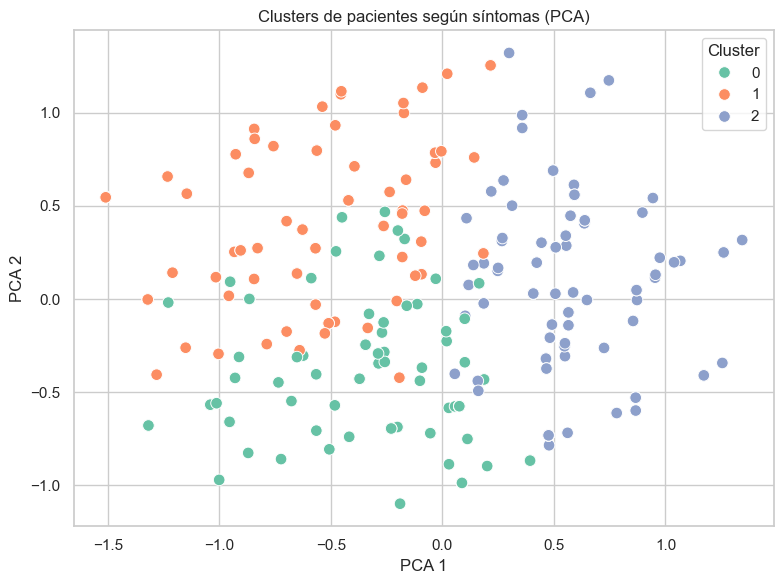

Características promedio por cluster:

Cluster                                                0     1     2
¿Qué tipo de síntomas persistentes tiene o ha t...  0.55  0.75  0.98
¿Qué tipo de síntomas persistentes tiene o ha t...  0.47  0.46  0.73
¿Qué tipo de síntomas persistentes tiene o ha t...  0.34  0.27  0.83
¿Qué tipo de síntomas persistentes tiene o ha t...  1.00  0.00  0.85
¿Qué tipo de síntomas persistentes tiene o ha t...  0.24  0.38  0.83
¿Qué tipo de síntomas persistentes tiene o ha t...  0.10  0.13  0.70
¿Qué tipo de síntomas persistentes tiene o ha t...  0.28  0.11  0.54
¿Qué tipo de síntomas persistentes tiene o ha t...  0.02  0.03  0.15
¿Qué tipo de síntomas persistentes tiene o ha t...  0.62  0.56  0.98
¿Qué tipo de síntomas persistentes tiene o ha t...  0.22  0.45  0.51


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# --- CARGAR DATOS ---
file_path = (r"C:\Users\USUARIO\Dropbox\Mi PC (i3)\Desktop\datos covid 19\percepcion_covid_persistente.xlsx")
df = pd.read_excel(file_path, sheet_name=0)

# --- PREPROCESAMIENTO DE SÍNTOMAS ---
sintoma_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas persistentes")]
df_sintomas = df[sintoma_cols].apply(pd.to_numeric, errors='coerce')

# --- 1. RED DE CO-OCURRENCIA ---
co_ocurrencia = df_sintomas.T.dot(df_sintomas)
frecuencias = df_sintomas.sum().sort_values(ascending=False)

# Crear grafo
G = nx.Graph()
for sintoma in sintoma_cols:
    G.add_node(sintoma, size=frecuencias[sintoma])

for i in sintoma_cols:
    for j in sintoma_cols:
        if i != j and co_ocurrencia.loc[i, j] > 0:
            G.add_edge(i, j, weight=co_ocurrencia.loc[i, j])

# Dibujar red
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
sizes = [G.nodes[n]['size'] * 80 for n in G.nodes()]
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=[w * 0.3 for w in weights], alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Red de co-ocurrencia de síntomas persistentes")
plt.axis('off')
plt.show()

# --- 2. CLUSTERING DE PACIENTES ---
# Usar sólo pacientes con al menos un síntoma
df_validos = df_sintomas[df_sintomas.sum(axis=1) > 0].copy()

# Aplicar K-means (elige k=3 como ejemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
df_validos['Cluster'] = kmeans.fit_predict(df_validos)

# PCA para reducir a 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(df_validos[sintoma_cols])

# Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=df_validos['Cluster'], palette='Set2', s=70)
plt.title('Clusters de pacientes según síntomas (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Características promedio por cluster
caracteristicas_cluster = df_validos.groupby('Cluster')[sintoma_cols].mean().T
print("Características promedio por cluster:\n")
print(caracteristicas_cluster.round(2))


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1435076180.py:52: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


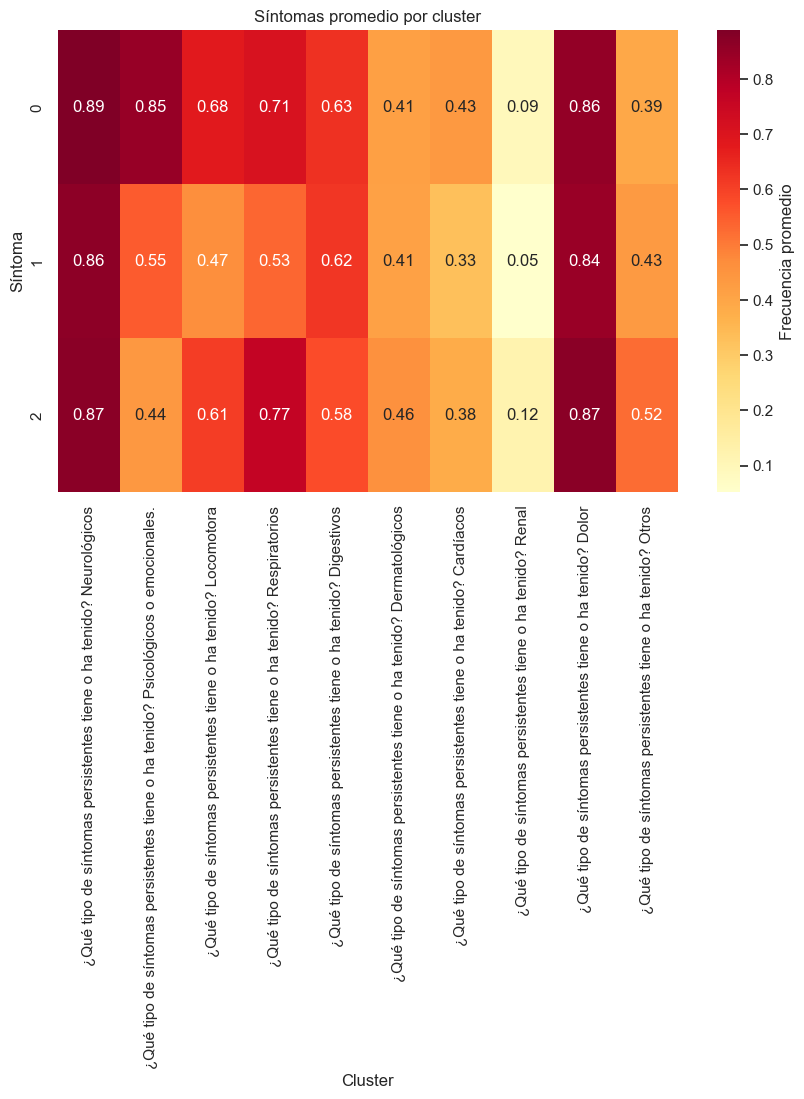

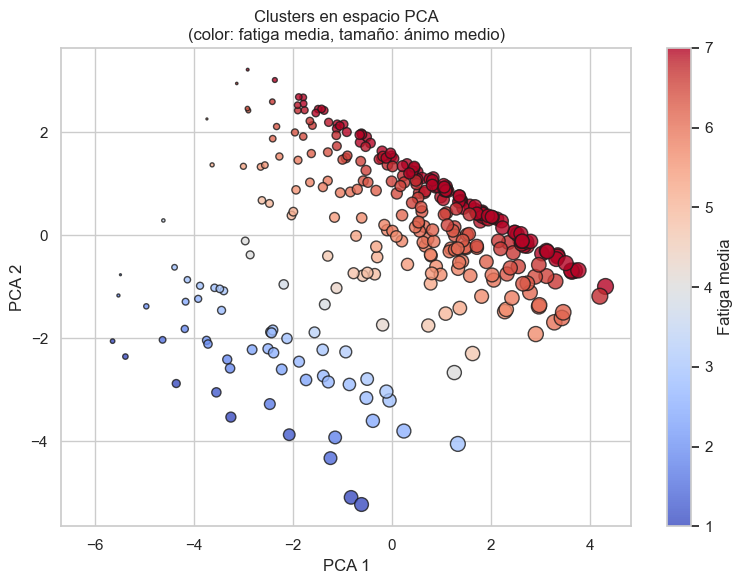

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# --- CARGAR DATOS ---
file_path =(r"C:\Users\USUARIO\Dropbox\Mi PC (i3)\Desktop\datos covid 19\percepcion_covid_persistente.xlsx")
df = pd.read_excel(file_path)

# --- IDENTIFICAR COLUMNAS ---
sintoma_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas persistentes")]
fatiga_cols = [col for col in df.columns if col.startswith("Fatiga")]
animo_cols = [col for col in df.columns if "estado de ánimo" in col.lower() or "ánimo" in col.lower()]

# --- CONVERTIR A NUMÉRICO ---
df_sintomas = df[sintoma_cols].apply(pd.to_numeric, errors='coerce')
df_fatiga = df[fatiga_cols].apply(pd.to_numeric, errors='coerce')
df_animo = df[animo_cols].apply(pd.to_numeric, errors='coerce') if animo_cols else pd.DataFrame()

# --- PACIENTES CON 3 O MÁS SÍNTOMAS ---
df['Nº síntomas'] = df_sintomas.sum(axis=1)
df_filtrado = df[df['Nº síntomas'] >= 3].copy()
df_sintomas_filtrado = df_sintomas.loc[df_filtrado.index]
df_fatiga_filtrado = df_fatiga.loc[df_filtrado.index]
df_animo_filtrado = df_animo.loc[df_filtrado.index]

# --- AGREGAR VARIABLES ---
df_filtrado['Fatiga media'] = df_fatiga_filtrado.mean(axis=1)
if not df_animo_filtrado.empty:
    df_filtrado['Ánimo medio'] = df_animo_filtrado.mean(axis=1)

# --- MATRIZ PARA CLUSTERING ---
clustering_vars = df_sintomas_filtrado.copy()
# Opcional: incluir también Fatiga y Ánimo en clustering
clustering_vars['Fatiga media'] = df_filtrado['Fatiga media']
if 'Ánimo medio' in df_filtrado.columns:
    clustering_vars['Ánimo medio'] = df_filtrado['Ánimo medio']

# --- CLUSTERING ---
kmeans = KMeans(n_clusters=3, random_state=42)
df_filtrado['Cluster'] = kmeans.fit_predict(clustering_vars)

# --- HEATMAP DE SÍNTOMAS PROMEDIO POR CLUSTER ---
sintomas_por_cluster = df_filtrado.groupby('Cluster')[sintoma_cols].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(sintomas_por_cluster, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Frecuencia promedio'})
plt.title("Síntomas promedio por cluster")
plt.ylabel("Síntoma")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()

# --- PCA + VISUALIZACIÓN (color = fatiga, tamaño = ánimo si disponible) ---
pca = PCA(n_components=2)
coords = pca.fit_transform(clustering_vars)

# Definir tamaño del punto
if 'Ánimo medio' in df_filtrado.columns:
    size_vals = df_filtrado['Ánimo medio'].fillna(1) * 15
else:
    size_vals = 50

# Gráfico de dispersión con PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    coords[:, 0], coords[:, 1],
    c=df_filtrado['Fatiga media'],
    s=size_vals,
    cmap='coolwarm', alpha=0.8, edgecolors='k'
)
plt.title("Clusters en espacio PCA\n(color: fatiga media, tamaño: ánimo medio)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Fatiga media')
plt.tight_layout()
plt.show()


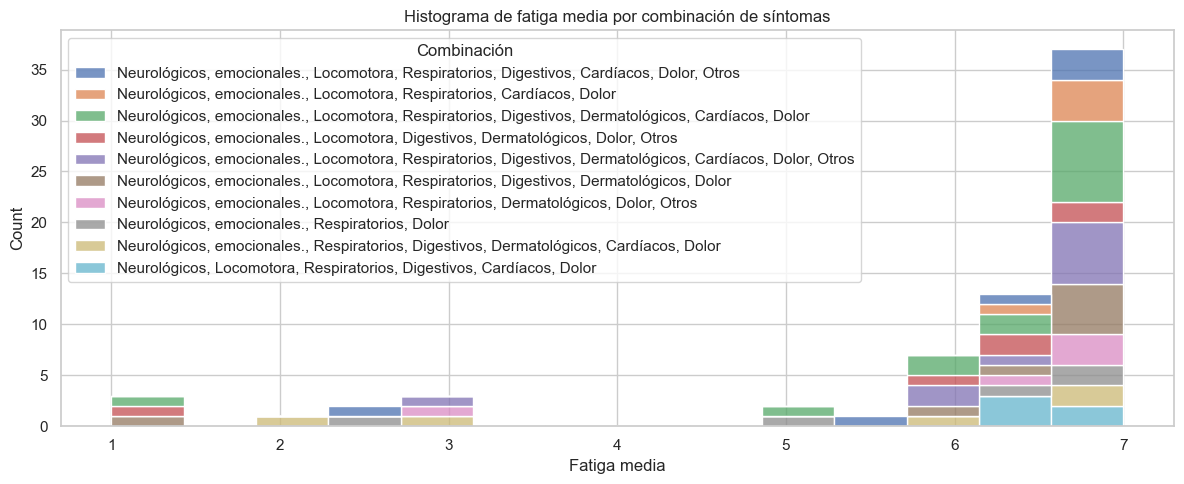

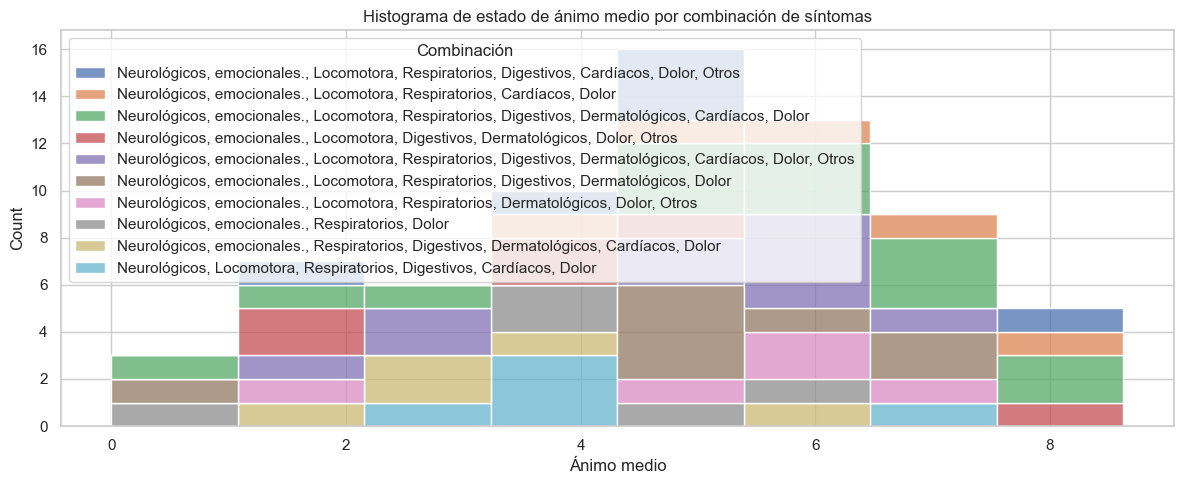

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1085860733.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Combinación', y='Fatiga media', palette='Set3')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1085860733.py:61: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


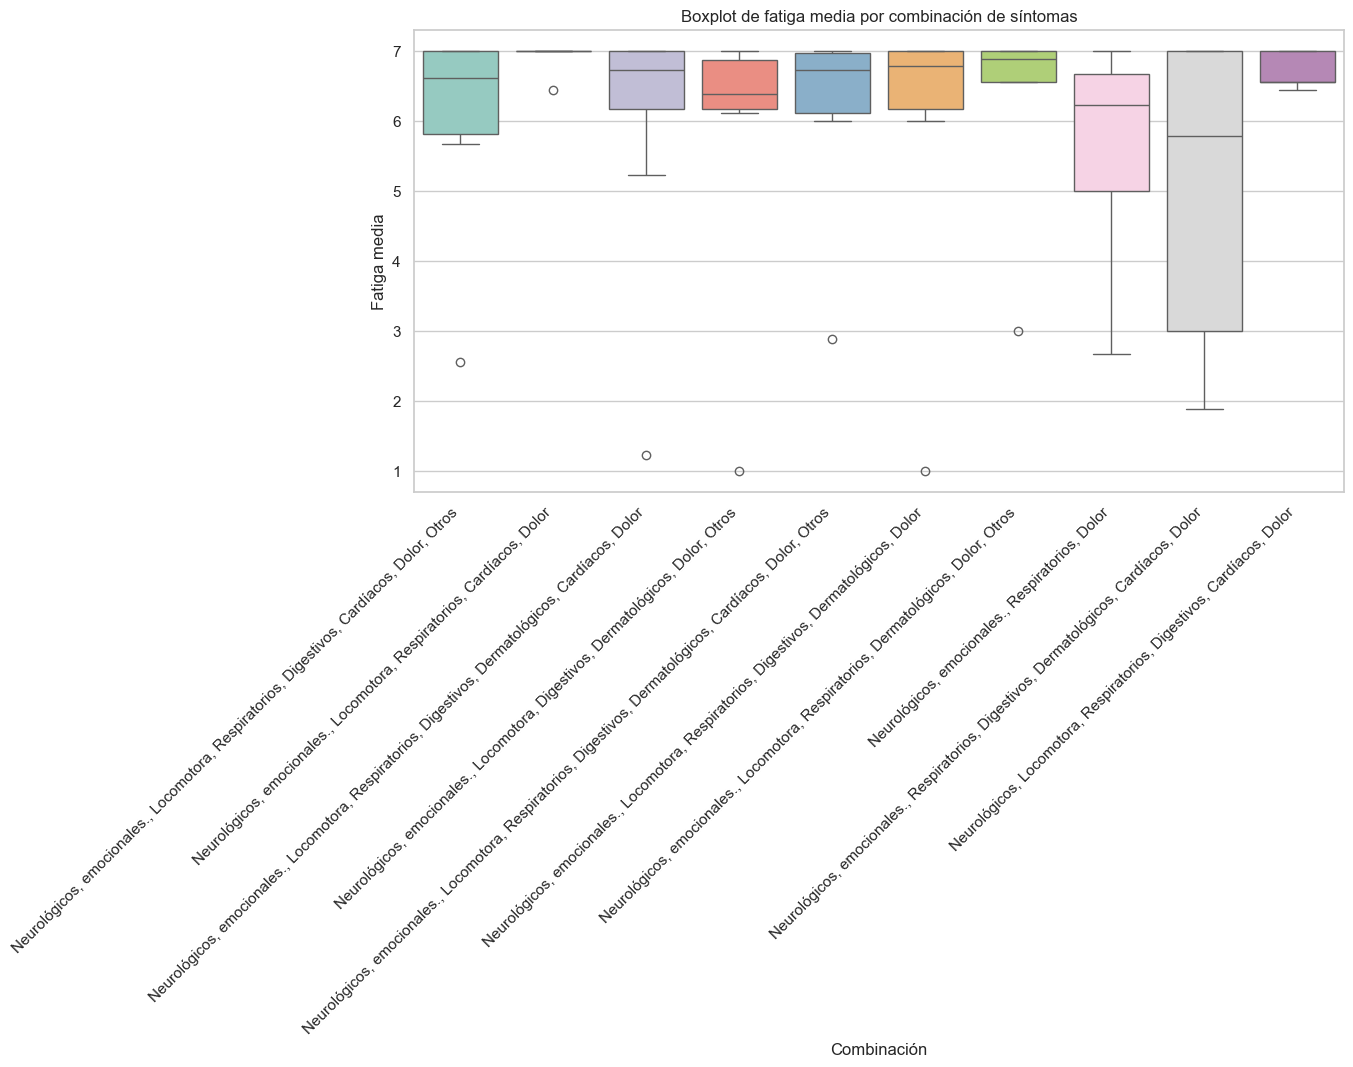

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1085860733.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Combinación', y='Ánimo medio', palette='Set2')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1085860733.py:69: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


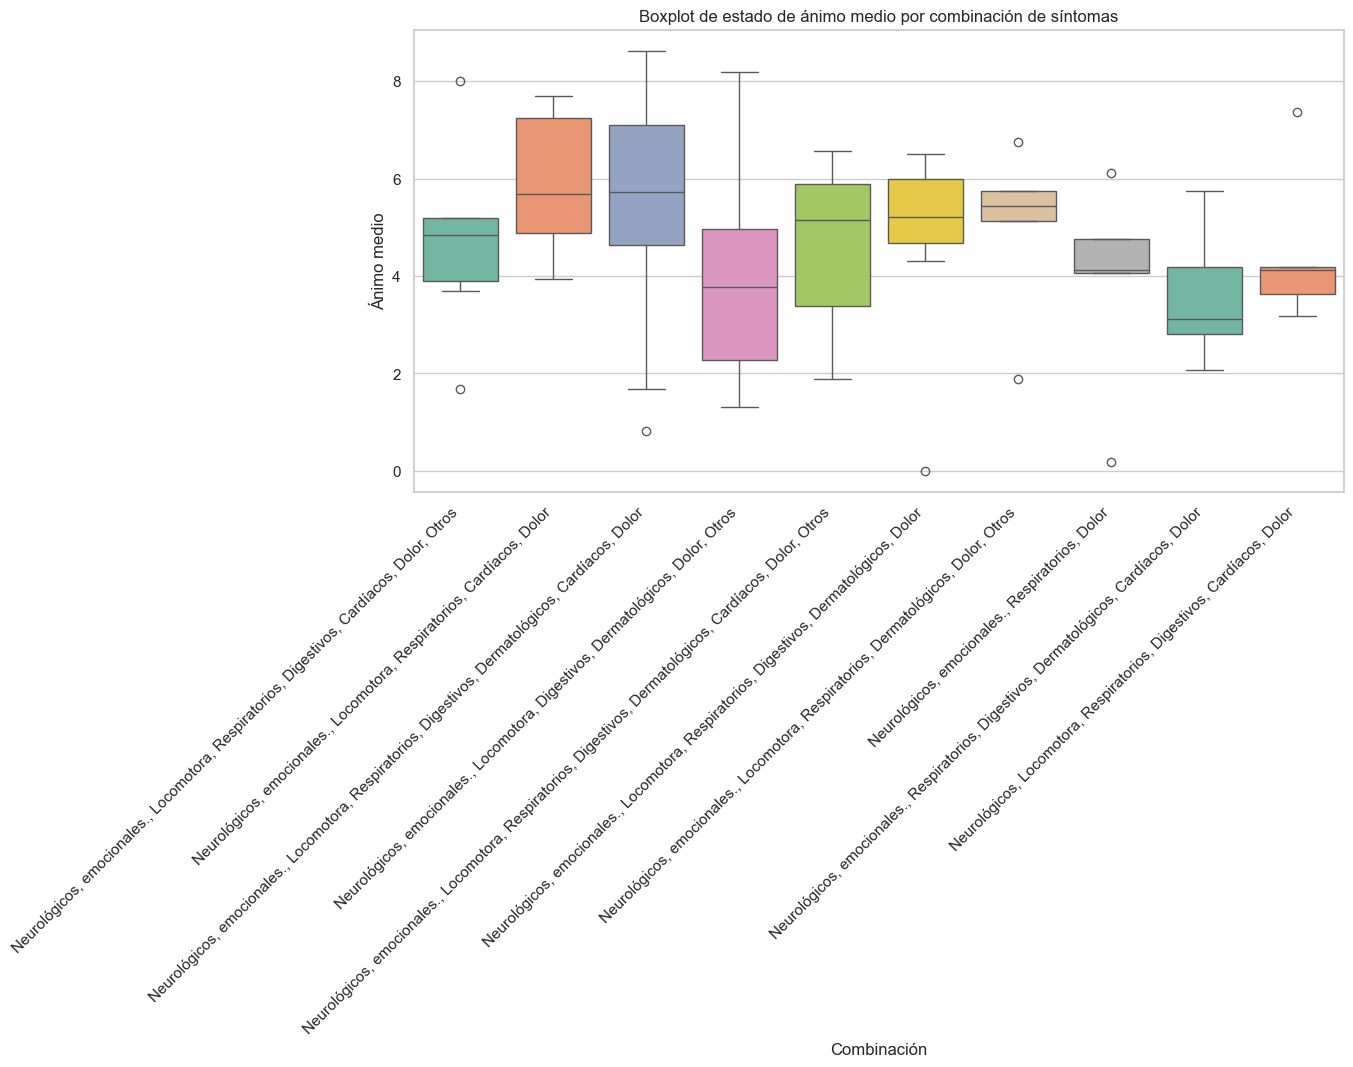

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- CARGAR DATOS ---
file_path =(r"C:\Users\USUARIO\Dropbox\Mi PC (i3)\Desktop\datos covid 19\percepcion_covid_persistente.xlsx")
df = pd.read_excel(file_path)

# --- IDENTIFICAR COLUMNAS ---
sintoma_cols = [col for col in df.columns if col.startswith("¿Qué tipo de síntomas persistentes")]
fatiga_cols = [col for col in df.columns if col.startswith("Fatiga")]
animo_cols = [col for col in df.columns if "estado de ánimo" in col.lower() or "ánimo" in col.lower()]

# --- CONVERTIR ---
df_sintomas = df[sintoma_cols].apply(pd.to_numeric, errors='coerce')
df_fatiga = df[fatiga_cols].apply(pd.to_numeric, errors='coerce')
df_animo = df[animo_cols].apply(pd.to_numeric, errors='coerce') if animo_cols else pd.DataFrame()

# --- CALCULAR FATIGA Y ÁNIMO ---
df['Fatiga media'] = df_fatiga.mean(axis=1)
if not df_animo.empty:
    df['Ánimo medio'] = df_animo.mean(axis=1)

# --- COMBINACIONES DE SÍNTOMAS ---
def combinar_sintomas(row):
    return ', '.join([
        col.split()[-1] for col, val in row.items() if val == 1
    ])

df['Nº síntomas'] = df_sintomas.sum(axis=1)
df_filtrado = df[df['Nº síntomas'] >= 3].copy()
df_sintomas_filtrado = df_sintomas.loc[df_filtrado.index]

df_filtrado['Combinación'] = df_sintomas_filtrado.apply(combinar_sintomas, axis=1)

# --- TOP 10 COMBINACIONES ---
top_10 = df_filtrado['Combinación'].value_counts().nlargest(10).index
df_top = df_filtrado[df_filtrado['Combinación'].isin(top_10)].copy()

# --- HISTOGRAMAS ---
plt.figure(figsize=(12, 5))
sns.histplot(data=df_top, x='Fatiga media', hue='Combinación', multiple='stack')
plt.title('Histograma de fatiga media por combinación de síntomas')
plt.xlabel('Fatiga media')
plt.tight_layout()
plt.show()

if 'Ánimo medio' in df_top.columns:
    plt.figure(figsize=(12, 5))
    sns.histplot(data=df_top, x='Ánimo medio', hue='Combinación', multiple='stack')
    plt.title('Histograma de estado de ánimo medio por combinación de síntomas')
    plt.xlabel('Ánimo medio')
    plt.tight_layout()
    plt.show()

# --- BOXPLOTS ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Combinación', y='Fatiga media', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Boxplot de fatiga media por combinación de síntomas')
plt.tight_layout()
plt.show()

if 'Ánimo medio' in df_top.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_top, x='Combinación', y='Ánimo medio', palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title('Boxplot de estado de ánimo medio por combinación de síntomas')
    plt.tight_layout()
    plt.show()


In [14]:
from scipy.stats import f_oneway

# Agrupar fatiga por combinación
grupos_fatiga = [group['Fatiga media'].dropna().values for name, group in df_top.groupby('Combinación')]

# ANOVA para fatiga
anova_fatiga = f_oneway(*grupos_fatiga)

print("📊 ANOVA - Fatiga media por combinación de síntomas:")
print(f"F = {anova_fatiga.statistic:.3f}, p = {anova_fatiga.pvalue:.5f}")
if anova_fatiga.pvalue < 0.05:
    print("✅ Hay diferencias estadísticamente significativas (p < 0.05)")
else:
    print("❌ No hay diferencias significativas entre grupos.")

# ANOVA para ánimo (si disponible)
if 'Ánimo medio' in df_top.columns:
    grupos_animo = [group['Ánimo medio'].dropna().values for name, group in df_top.groupby('Combinación')]
    anova_animo = f_oneway(*grupos_animo)

    print("\n📊 ANOVA - Ánimo medio por combinación de síntomas:")
    print(f"F = {anova_animo.statistic:.3f}, p = {anova_animo.pvalue:.5f}")
    if anova_animo.pvalue < 0.05:
        print("✅ Hay diferencias estadísticamente significativas (p < 0.05)")
    else:
        print("❌ No hay diferencias significativas entre grupos.")


📊 ANOVA - Fatiga media por combinación de síntomas:
F = 0.618, p = 0.77686
❌ No hay diferencias significativas entre grupos.

📊 ANOVA - Ánimo medio por combinación de síntomas:
F = 0.730, p = 0.68003
❌ No hay diferencias significativas entre grupos.


In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --- Tukey HSD para Fatiga media ---
tukey_fatiga = pairwise_tukeyhsd(
    endog=df_top['Fatiga media'],
    groups=df_top['Combinación'],
    alpha=0.05
)

print("🔍 Tukey HSD - Fatiga media:")
print(tukey_fatiga.summary())

# --- Tukey HSD para Ánimo medio (si existe) ---
if 'Ánimo medio' in df_top.columns:
    tukey_animo = pairwise_tukeyhsd(
        endog=df_top['Ánimo medio'],
        groups=df_top['Combinación'],
        alpha=0.05
    )

    print("\n🔍 Tukey HSD - Ánimo medio:")
    print(tukey_animo.summary())


🔍 Tukey HSD - Fatiga media:
                                                                                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                                                                    
                                                  group1                                                                                                     group2                                                   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                     Neurológicos, Locomotora, Respiratorios, Digestivos, Cardíacos, Dolor                           Neurológicos, emocionales., Locomotora, Digestivos, Dermatológicos, Dolor, Otros   

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4744\1120010796.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


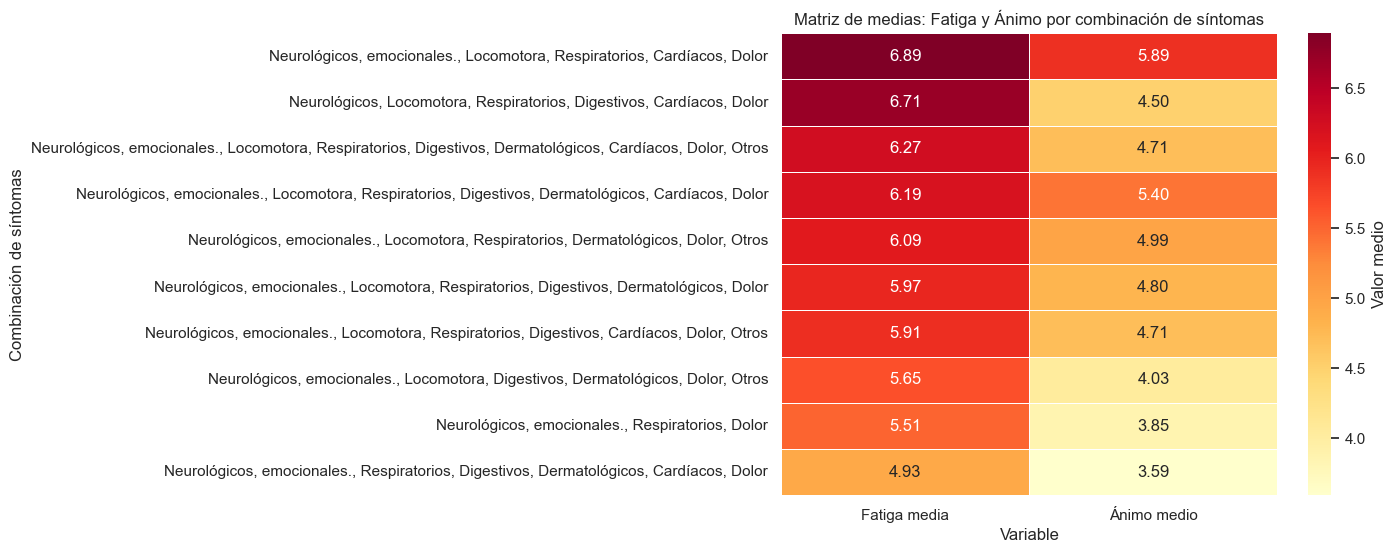

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por combinación y calcular medias
resumen = df_top.groupby('Combinación')[['Fatiga media', 'Ánimo medio']].mean().round(2)

# Reordenar combinaciones por fatiga media descendente
resumen = resumen.sort_values('Fatiga media', ascending=False)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(resumen, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Valor medio'})
plt.title('Matriz de medias: Fatiga y Ánimo por combinación de síntomas')
plt.ylabel('Combinación de síntomas')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()
